In [3]:
# faceMask hDDM drift rate analysis script: mask analyses of false negatives (failing to ID correct emotion)
# 11/25/20

# note: to be run within python 3.5 environment named "hddm" (from console: 'source activate hddm')
# confirm jupyter notebook is launching from "hddm" environment (see top-right: 'conda env:hddm')

# set up
import numpy as np
print(np.__version__) # should be 1.11.3

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import hddm
print(hddm.__version__) # should be 0.6.0

from patsy import dmatrix

1.11.3
0.6.0


/Users/Craig/anaconda3/envs/hddm/lib/python3.5/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [4]:
# load hDDM-processed data from CSV file into a NumPy structured array
data = hddm.load_csv('faceMask_hddm_proc.csv')
                     
# flip 'no' response RTs to be negative
data = hddm.utils.flip_errors(data)

# check dataset
data.head(10)

subj_idx  block  faceList emotionRating  trial             stimulus  \
0  gc2le9xecjp1stz      0         3         angry      0  _faces/22_F_R_U.jpg   
1  gc2le9xecjp1stz      0         3         angry      1  _faces/07_M_H_L.jpg   
2  gc2le9xecjp1stz      0         3         angry      2  _faces/46_M_R_X.jpg   
3  gc2le9xecjp1stz      0         3         angry      3  _faces/47_M_S_L.jpg   
4  gc2le9xecjp1stz      0         3         angry      4  _faces/25_M_R_X.jpg   
5  gc2le9xecjp1stz      0         3         angry      5  _faces/27_F_A_U.jpg   
6  gc2le9xecjp1stz      0         3         angry      6  _faces/08_F_S_U.jpg   
7  gc2le9xecjp1stz      0         3         angry      7  _faces/38_M_H_X.jpg   
8  gc2le9xecjp1stz      0         3         angry      8  _faces/30_M_A_U.jpg   
9  gc2le9xecjp1stz      0         3         angry      9  _faces/04_F_R_U.jpg   

       face  model sex expression      mask  response        rt  faceAngry  \
0  22_F_R_U     22   F  surprised     upper         0 -4.636150          0   
1  07_M_H_L      7   M      happy     lower         0 -2.079460          0   
2  46_M_R_X     46   M  surprised  baseline         0 -1.847670          0   
3  47_M_S_L     47   M        sad     lower         0 -6.506275          0   
4  25_M_R_X     25   M  surprised  baseline         0 -1.536780          0   
5  27_F_A_U     27   F      angry     upper         1  1.906175         50   
6  08_F_S_U      8   F        sad     upper         0 -2.182530          0   
7  38_M_H_X     38   M      happy  baseline         0 -1.445230          0   
8  30_M_A_U     30   M      angry     upper         1  1.405270         50   
9  04_F_R_U      4   F  surprised     upper         0 -1.945385          0   

   faceDisgusted  faceFearful  faceHappy  faceSad  faceSurprised  
0              0            0          0        0             50  
1              0            0         50        0              0  
2              0            0          0        0            100  
3              0            0          0       50              0  
4              0            0          0        0            100  
5              0            0          0        0              0  
6              0            0          0       50              0  
7              0            0        100        0              0  
8              0            0          0        0              0  
9              0            0          0        0             50

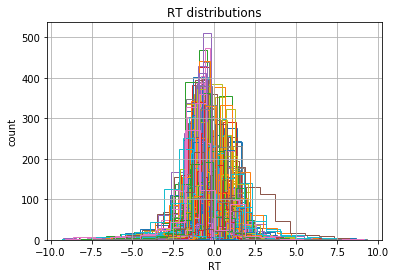

In [5]:
# plot RTs for each participant
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in data.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

In [6]:
## all ratings (congruent faces)
# subset dataset by emotion rating type and facial expression (congruent)
xx_data = data.loc[(data['emotionRating'] == data['expression'])]
xx_data.head(10)

subj_idx  block  faceList emotionRating  trial  \
5   gc2le9xecjp1stz      0         3         angry      5   
8   gc2le9xecjp1stz      0         3         angry      8   
15  gc2le9xecjp1stz      0         3         angry     17   
17  gc2le9xecjp1stz      0         3         angry     19   
29  gc2le9xecjp1stz      0         3         angry     31   
32  gc2le9xecjp1stz      0         3         angry     34   
35  gc2le9xecjp1stz      0         3         angry     37   
38  gc2le9xecjp1stz      0         3         angry     40   
41  gc2le9xecjp1stz      0         3         angry     43   
43  gc2le9xecjp1stz      0         3         angry     45   

               stimulus      face  model sex expression      mask  response  \
5   _faces/27_F_A_U.jpg  27_F_A_U     27   F      angry     upper         1   
8   _faces/30_M_A_U.jpg  30_M_A_U     30   M      angry     upper         1   
15  _faces/27_F_A_L.jpg  27_F_A_L     27   F      angry     lower         1   
17  _faces/15_M_A_U.jpg  15_M_A_U     15   M      angry     upper         1   
29  _faces/58_F_A_X.jpg  58_F_A_X     58   F      angry  baseline         1   
32  _faces/15_M_A_L.jpg  15_M_A_L     15   M      angry     lower         1   
35  _faces/27_F_A_X.jpg  27_F_A_X     27   F      angry  baseline         1   
38  _faces/49_M_A_L.jpg  49_M_A_L     49   M      angry     lower         0   
41  _faces/30_M_A_X.jpg  30_M_A_X     30   M      angry  baseline         1   
43  _faces/12_F_A_U.jpg  12_F_A_U     12   F      angry     upper         1   

          rt  faceAngry  faceDisgusted  faceFearful  faceHappy  faceSad  \
5   1.906175         50              0            0          0        0   
8   1.405270         50              0            0          0        0   
15  1.293860         50              0            0          0        0   
17  2.019210         50              0            0          0        0   
29  1.656685        100              0            0          0        0   
32  1.007755         50              0            0          0        0   
35  0.997660        100              0            0          0        0   
38 -0.940125         50              0            0          0        0   
41  0.927440        100              0            0          0        0   
43  1.621310         50              0            0          0        0   

    faceSurprised  
5               0  
8               0  
15              0  
17              0  
29              0  
32              0  
35              0  
38              0  
41              0  
43              0

In [7]:
# define model
m_xx = hddm.HDDMRegressor(xx_data, "v ~ C(mask)", bias=True, p_outlier=0.05)

Adding these covariates:
['v_Intercept', 'v_C(mask)[T.lower]', 'v_C(mask)[T.upper]']


/Users/Craig/anaconda3/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 5001 of 5000 complete in 23378.8 sec

/Users/Craig/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                        mean         std         2.5q         25q         50q         75q      97.5q       mc err
a                                    1.75892   0.0316572      1.69811     1.73759     1.75834     1.77908     1.8225  0.000610304
a_std                               0.460506   0.0241011     0.416491    0.443239    0.459829    0.476616   0.510655  0.000449401
a_subj.02hcv424u29nd5w               2.43966    0.151589      2.17248     2.33048     2.43268     2.53757    2.75239   0.00340409
a_subj.02k2uwlhgxnumn9                1.6771   0.0990454      1.49572     1.60698     1.67251     1.73982     1.8876   0.00274411
a_subj.03g7h2hzq4o3g26               3.10264    0.134107      2.84701     3.01162     3.09674     3.19089    3.37776   0.00256641
a_subj.0nmr75cysk1ae0e               2.01661    0.105445      1.82604     1.94296     2.01189     2.08494    2.23684   0.00244298
a_subj.0t8qp67pqkw36cb               1.77092   0.0811609      1.62154     1.71478     1.76

Plotting t
Plotting t_std
Plotting z
Plotting z_std
Plotting v_Intercept
Plotting v_Intercept_std
Plotting v_C(mask)[T.lower]
Plotting v_C(mask)[T.upper]


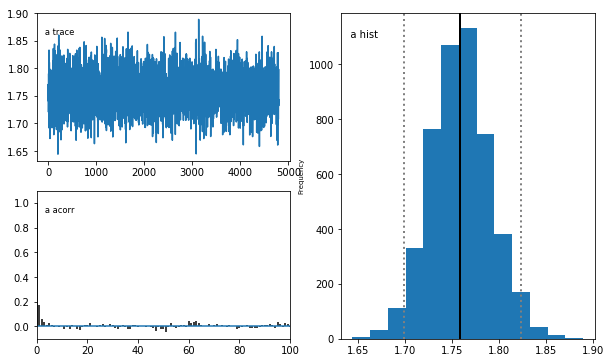

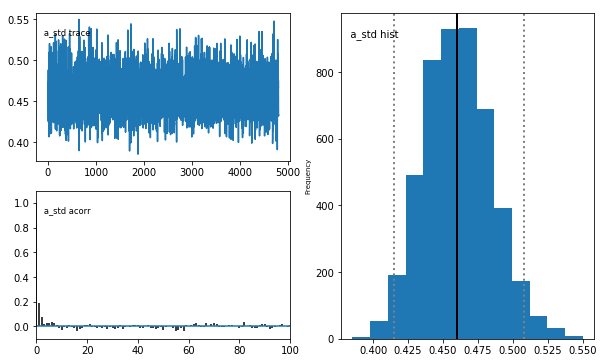

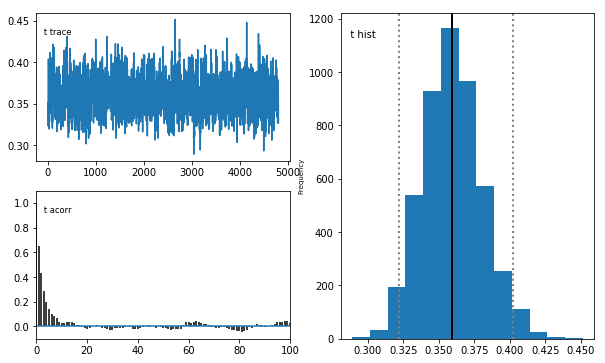

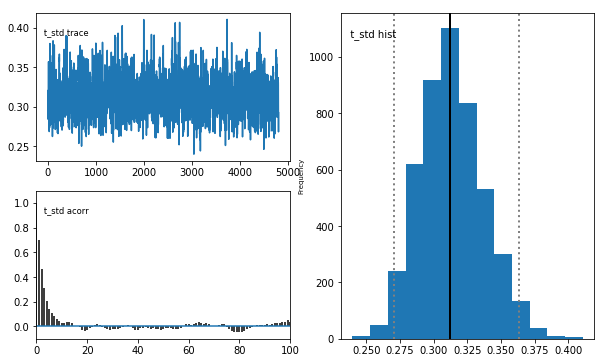

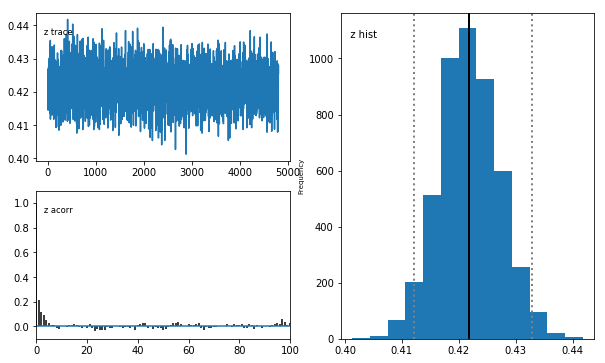

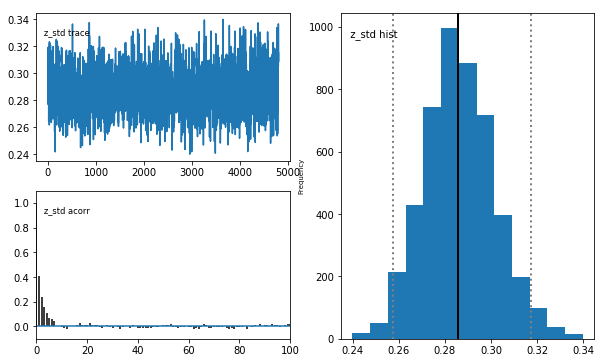

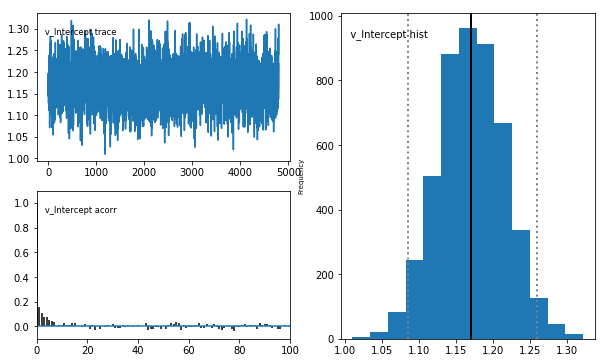

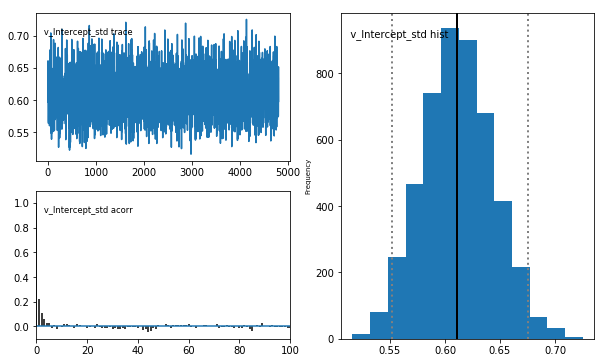

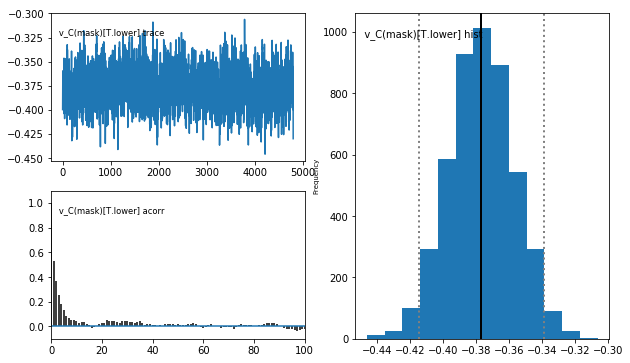

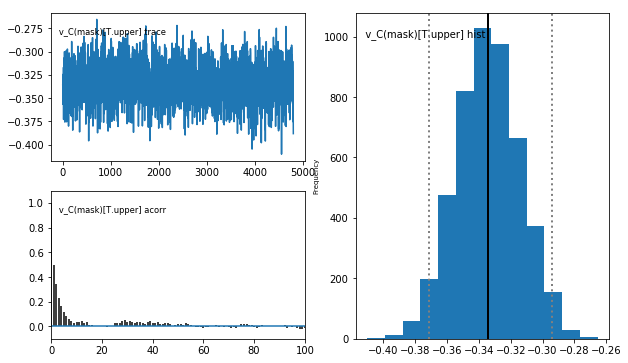

In [8]:
# run model
m_xx.sample(5000, burn=200, dbname='traces.db', db='pickle')
m_xx.print_stats()
m_xx.plot_posteriors()

/Users/Craig/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                       mean        std       2.5q        25q  \
a                                   1.75892  0.0316572    1.69811    1.73759   
a_std                              0.460506  0.0241011   0.416491   0.443239   
a_subj.02hcv424u29nd5w              2.43966   0.151589    2.17248    2.33048   
a_subj.02k2uwlhgxnumn9               1.6771  0.0990454    1.49572    1.60698   
a_subj.03g7h2hzq4o3g26              3.10264   0.134107    2.84701    3.01162   
a_subj.0nmr75cysk1ae0e              2.01661   0.105445    1.82604    1.94296   
a_subj.0t8qp67pqkw36cb              1.77092  0.0811609    1.62154    1.71478   
a_subj.0vfpn4uf3t031qu              1.16459  0.0521373    1.06724    1.12792   
a_subj.11dsfdtym1yy5mx              1.78608  0.0795623    1.63733    1.73315   
a_subj.1d3dadyu4ekqb4q              1.52863  0.0883017    1.36828    1.46569   
a_subj.1mt2emp4645cbl1              2.15148  0.0971287    1.96952    2.08555   
a_subj.1rst24mbtgy9rc8              1.78

Plotting a_std
Plotting t
Plotting t_std
Plotting z
Plotting z_std
Plotting v_Intercept
Plotting v_Intercept_std
Plotting v_C(mask)[T.lower]
Plotting v_C(mask)[T.upper]


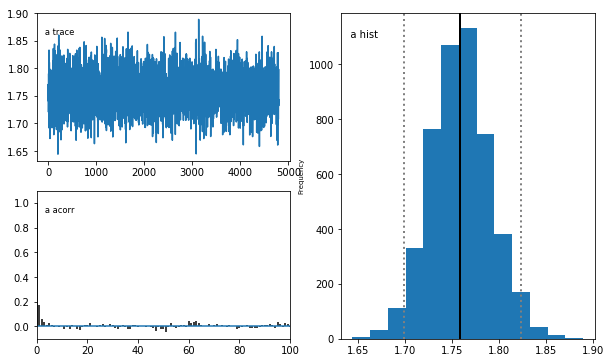

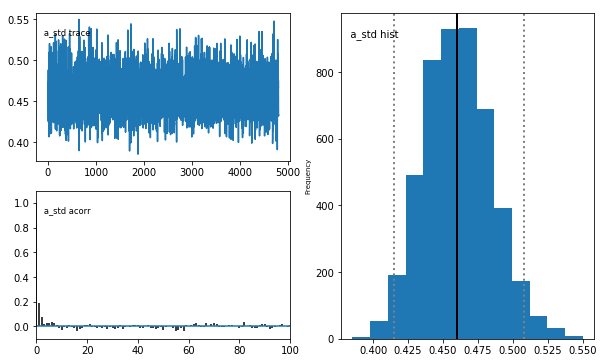

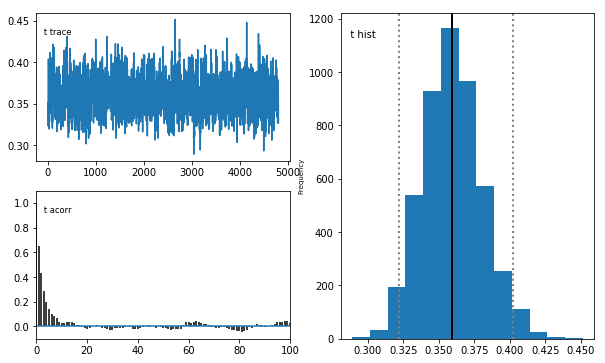

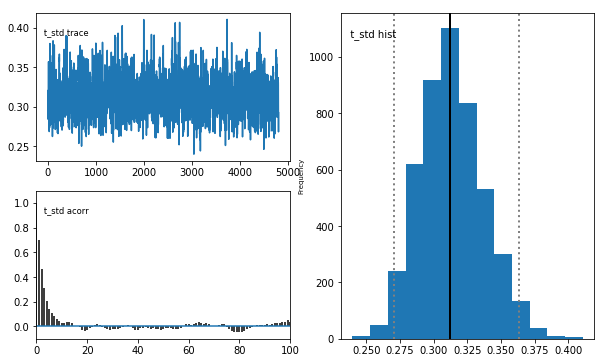

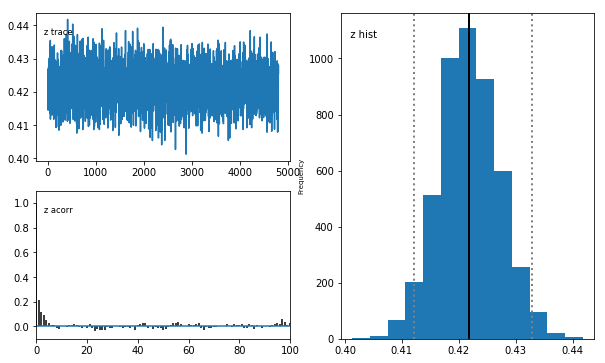

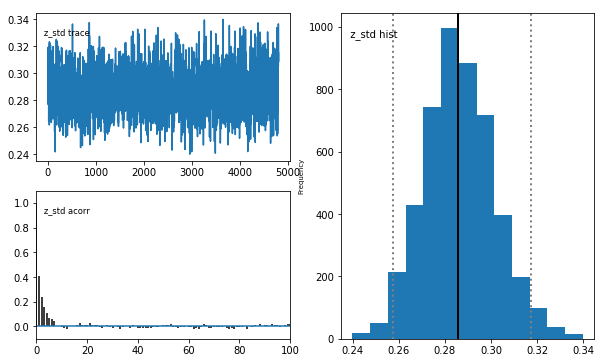

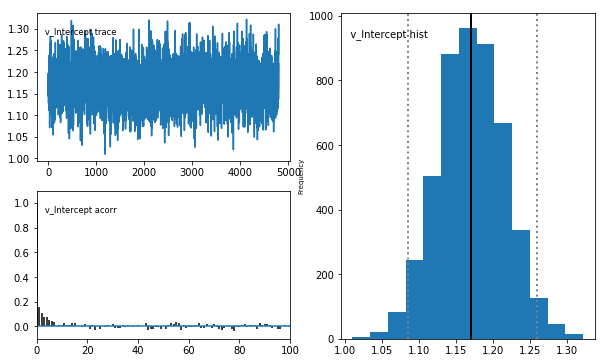

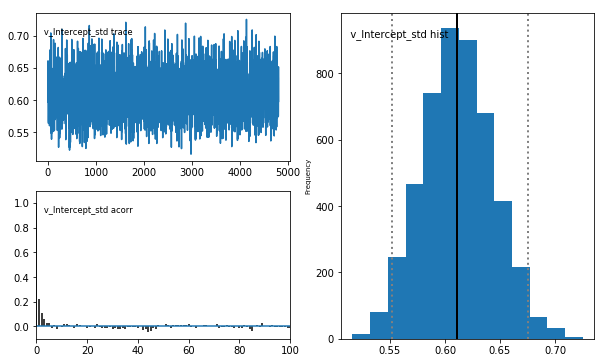

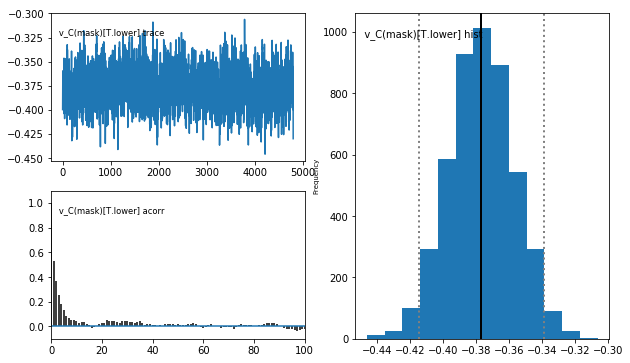

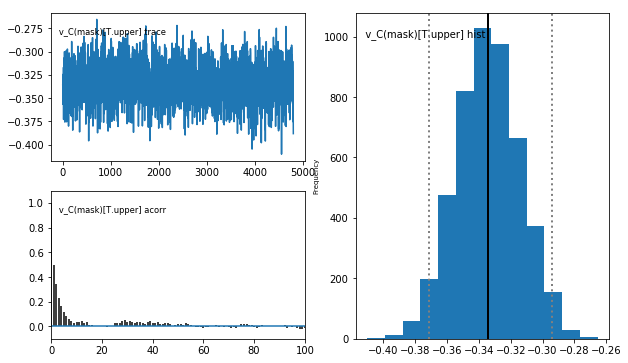

In [10]:
# save model stats
xx_stats = m_xx.gen_stats()
print(xx_stats)
# xx_stats.to_csv('_drift_maskFalseNegatives/xx_5000/faceMask_hddm_faceRatings_maskFalseNegatives_xx_5000.csv', index=True)

# save model posterior plots
# m_xx.plot_posteriors(path='_drift_maskFalseNegatives/xx_5000/_posteriors', save=True)

In [11]:
# plot model posteriors by mask
xx_v_none, xx_v_lower, xx_v_upper = m_xx.nodes_db.node[["v_Intercept", "v_C(mask)[T.lower]", "v_C(mask)[T.upper]"]]
hddm.analyze.plot_posterior_nodes([xx_v_none, xx_v_lower, xx_v_upper])
# plt.savefig('_drift_maskFalseNegatives/xx_5000/faceMask_hddm_faceRatings_maskFalseNegatives_xx_5000_v_mask.pdf')

In [13]:
## estimate probabilities that mask coefficient posteriors differ from 0
# note that comparison condition coefficients (i.e. lower/upper) are *relative to* baseline condition (i.e. no mask)
# for lower/upper, =0 means no change from baseline, <0 means less than baseline, and >0 means greater than baseline
# for no mask, =0 means null drift, <0 means negative drift, and >0 means positive drift
print("P(xx_v_none < 0) = ", (xx_v_none.trace() < 0).mean())
print("P(xx_v_lower > 0) = ", (xx_v_lower.trace() > 0).mean())
print("P(xx_v_upper > 0) = ", (xx_v_upper.trace() > 0).mean())

# estimate probability that lower and upper mask coefficient posteriors differ
print("P(xx_v_lower > xx_v_upper) = ", (xx_v_lower.trace() > xx_v_upper.trace()).mean())

P(xx_v_none < 0) =  0.0
P(xx_v_lower > 0) =  0.0
P(xx_v_upper > 0) =  0.0
P(xx_v_lower > xx_v_upper) =  0.0164583333333


In [4]:
## rating angry (angry faces)
# subset dataset by emotion rating type (angry) and facial expression (angry)
aa_data = data.loc[(data['emotionRating'] == 'angry') & (data['expression'] == 'angry')]
aa_data.head(10)

subj_idx  block  faceList emotionRating  trial  \
5   gc2le9xecjp1stz      0         3         angry      5   
8   gc2le9xecjp1stz      0         3         angry      8   
15  gc2le9xecjp1stz      0         3         angry     17   
17  gc2le9xecjp1stz      0         3         angry     19   
29  gc2le9xecjp1stz      0         3         angry     31   
32  gc2le9xecjp1stz      0         3         angry     34   
35  gc2le9xecjp1stz      0         3         angry     37   
38  gc2le9xecjp1stz      0         3         angry     40   
41  gc2le9xecjp1stz      0         3         angry     43   
43  gc2le9xecjp1stz      0         3         angry     45   

               stimulus      face  model sex expression      mask  response  \
5   _faces/27_F_A_U.jpg  27_F_A_U     27   F      angry     upper         1   
8   _faces/30_M_A_U.jpg  30_M_A_U     30   M      angry     upper         1   
15  _faces/27_F_A_L.jpg  27_F_A_L     27   F      angry     lower         1   
17  _faces/15_M_A_U.jpg  15_M_A_U     15   M      angry     upper         1   
29  _faces/58_F_A_X.jpg  58_F_A_X     58   F      angry  baseline         1   
32  _faces/15_M_A_L.jpg  15_M_A_L     15   M      angry     lower         1   
35  _faces/27_F_A_X.jpg  27_F_A_X     27   F      angry  baseline         1   
38  _faces/49_M_A_L.jpg  49_M_A_L     49   M      angry     lower         0   
41  _faces/30_M_A_X.jpg  30_M_A_X     30   M      angry  baseline         1   
43  _faces/12_F_A_U.jpg  12_F_A_U     12   F      angry     upper         1   

          rt  faceAngry  faceDisgusted  faceFearful  faceHappy  faceSad  \
5   1.906175         50              0            0          0        0   
8   1.405270         50              0            0          0        0   
15  1.293860         50              0            0          0        0   
17  2.019210         50              0            0          0        0   
29  1.656685        100              0            0          0        0   
32  1.007755         50              0            0          0        0   
35  0.997660        100              0            0          0        0   
38 -0.940125         50              0            0          0        0   
41  0.927440        100              0            0          0        0   
43  1.621310         50              0            0          0        0   

    faceSurprised  
5               0  
8               0  
15              0  
17              0  
29              0  
32              0  
35              0  
38              0  
41              0  
43              0

In [5]:
# drop any subjects missing columns in design matrix (otherwise produces error)
aa_data = aa_data[(aa_data.subj_idx != 'f89wrv54kh9lqrw')]

In [123]:
# define model
m_aa = hddm.HDDMRegressor(aa_data, "v ~ C(mask)", bias=True, p_outlier=0.05)

Adding these covariates:
['v_Intercept', 'v_C(mask)[T.lower]', 'v_C(mask)[T.upper]']


/Users/Craig/anaconda3/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 5001 of 5000 complete in 31349.8 sec

/Users/Craig/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                        mean        std        2.5q         25q          50q        75q      97.5q       mc err
a                                    1.64296   0.036505     1.57165     1.61876      1.64283    1.66624    1.71705  0.000920082
a_std                               0.506247  0.0314626    0.448078    0.484265       0.5055   0.526314   0.572005  0.000897539
a_subj.02hcv424u29nd5w               2.23867   0.316391     1.71593     2.01487       2.2022    2.42705    2.95497   0.00865845
a_subj.02k2uwlhgxnumn9               1.27113   0.167032    0.986276     1.15222      1.25698    1.37566     1.6342   0.00426467
a_subj.03g7h2hzq4o3g26               2.93169   0.286919     2.41915      2.7318       2.9124    3.11213    3.54235   0.00523153
a_subj.0nmr75cysk1ae0e                1.8151   0.208641     1.45597     1.66553      1.79608    1.94793    2.27043   0.00465612
a_subj.0t8qp67pqkw36cb                1.3476   0.160168     1.07263     1.23186      1.33546    1.44841 

Plotting t
Plotting t_std
Plotting z
Plotting z_std
Plotting v_Intercept
Plotting v_Intercept_std
Plotting v_C(mask)[T.lower]
Plotting v_C(mask)[T.upper]


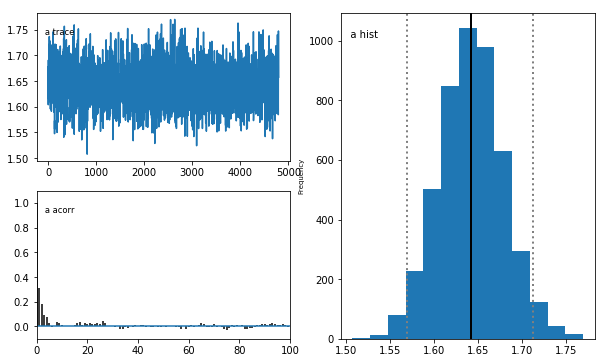

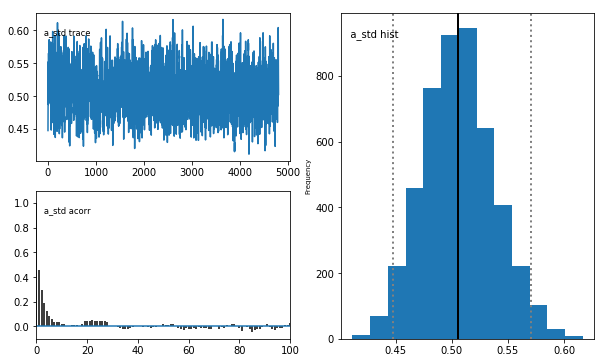

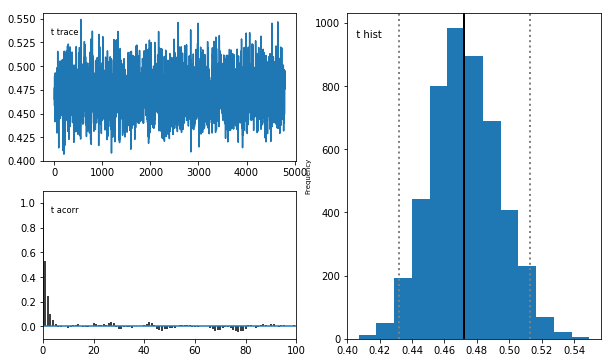

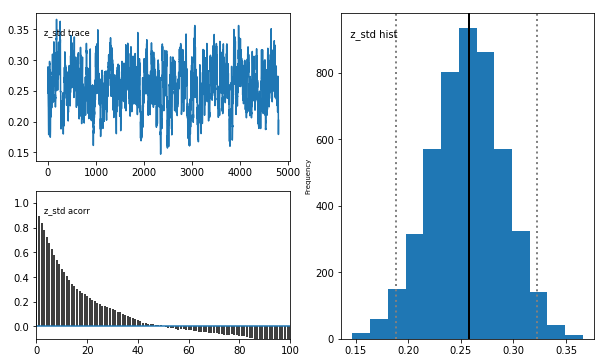

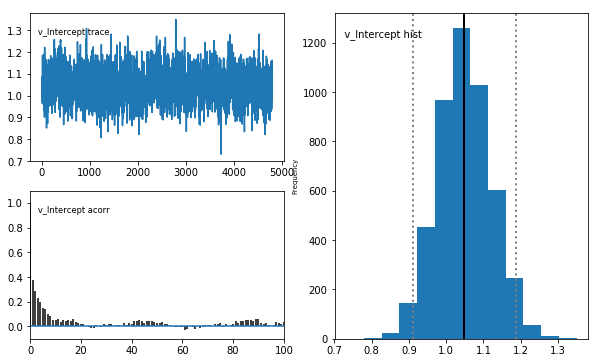

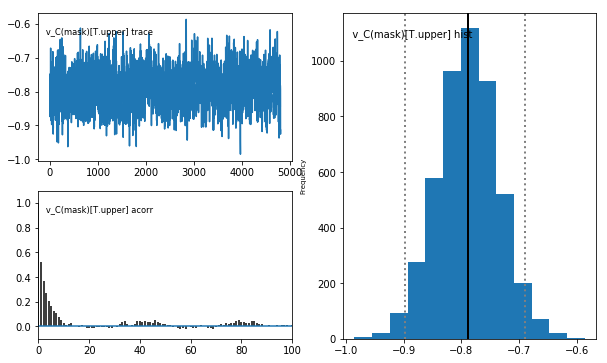

In [124]:
# run model
m_aa.sample(5000, burn=200, dbname='traces.db', db='pickle')
m_aa.print_stats()
m_aa.plot_posteriors()

/Users/Craig/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                        mean        std        2.5q  \
a                                    1.64296   0.036505     1.57165   
a_std                               0.506247  0.0314626    0.448078   
a_subj.02hcv424u29nd5w               2.23867   0.316391     1.71593   
a_subj.02k2uwlhgxnumn9               1.27113   0.167032    0.986276   
a_subj.03g7h2hzq4o3g26               2.93169   0.286919     2.41915   
a_subj.0nmr75cysk1ae0e                1.8151   0.208641     1.45597   
a_subj.0t8qp67pqkw36cb                1.3476   0.160168     1.07263   
a_subj.0vfpn4uf3t031qu               1.07647   0.129987    0.850634   
a_subj.11dsfdtym1yy5mx                1.7249   0.182005     1.39855   
a_subj.1d3dadyu4ekqb4q               1.34929   0.171526     1.06405   
a_subj.1mt2emp4645cbl1               1.85974   0.210653     1.49193   
a_subj.1rst24mbtgy9rc8               1.79322   0.195506     1.46686   
a_subj.1sala6c9yc2bm1w                  1.94   0.371734     1.34104   
a_subj

Plotting a_std
Plotting t
Plotting t_std
Plotting z
Plotting z_std
Plotting v_Intercept
Plotting v_Intercept_std
Plotting v_C(mask)[T.lower]
Plotting v_C(mask)[T.upper]


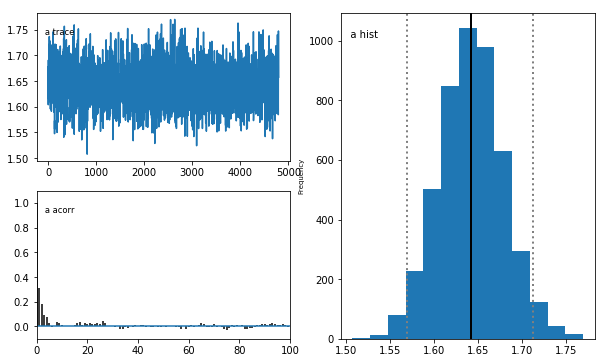

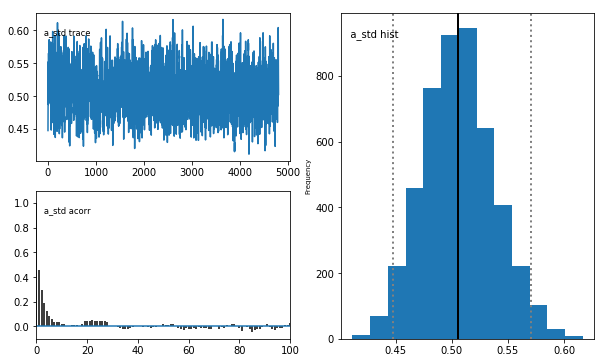

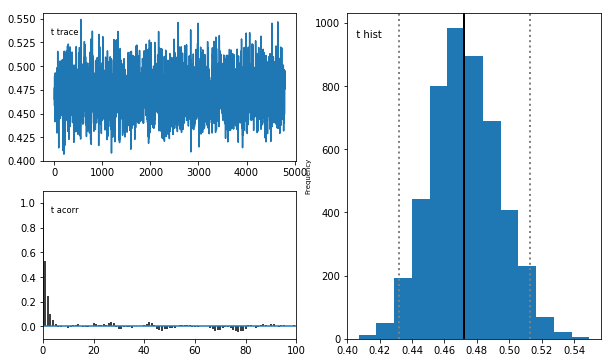

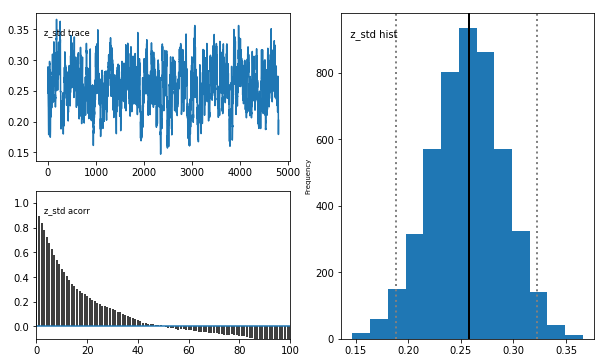

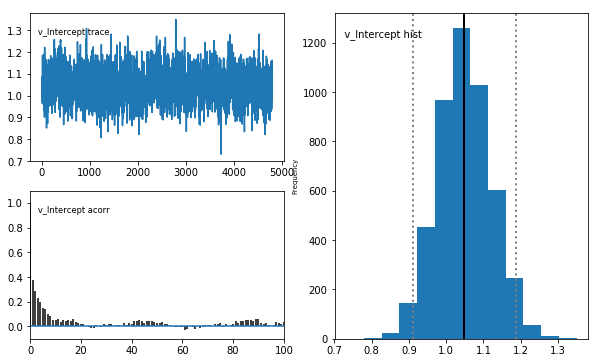

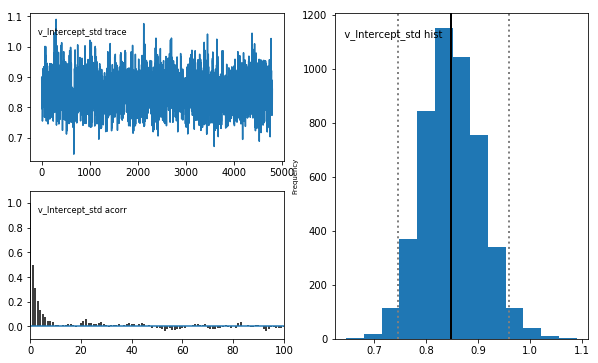

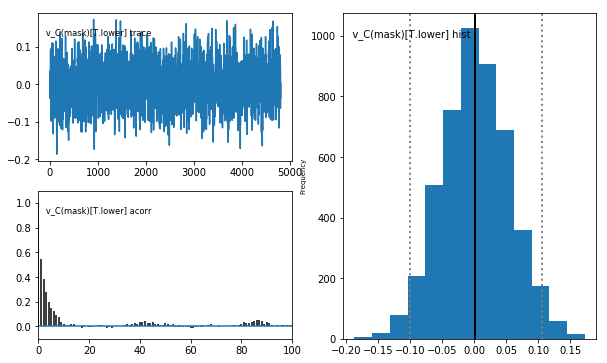

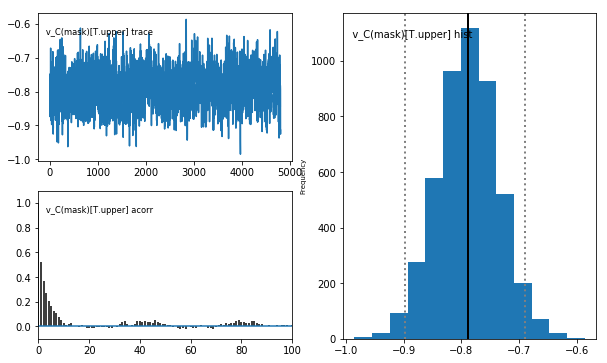

In [125]:
# save model stats
aa_stats = m_aa.gen_stats()
print(aa_stats)
# aa_stats.to_csv('_maskFalseNegatives/aa_5000/faceMask_hddm_faceRatings_maskFalseNegatives_aa_5000.csv', index=True)

# save model posterior plots
# m_aa.plot_posteriors(path='_maskFalseNegatives/aa_5000/_posteriors', save=True)

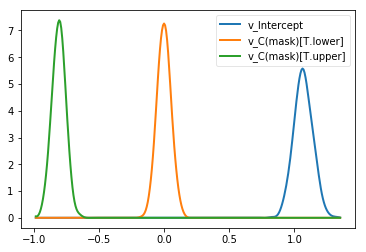

In [126]:
# plot model posteriors by mask
aa_v_none, aa_v_lower, aa_v_upper = m_aa.nodes_db.node[["v_Intercept", "v_C(mask)[T.lower]", "v_C(mask)[T.upper]"]]
hddm.analyze.plot_posterior_nodes([aa_v_none, aa_v_lower, aa_v_upper])
# plt.savefig('_maskFalseNegatives/aa_5000/faceMask_hddm_faceRatings_maskFalseNegatives_aa_5000_v_mask.pdf')

In [150]:
## estimate probabilities that mask coefficient posteriors differ from 0
# note that comparison condition coefficients (i.e. lower/upper) are *relative to* baseline condition (i.e. no mask)
# for lower/upper, =0 means no change from baseline, <0 means less than baseline, and >0 means greater than baseline
# for no mask, =0 means null drift, <0 means negative drift, and >0 means positive drift
print("P(aa_v_none < 0) = ", (aa_v_none.trace() < 0).mean())
print("P(aa_v_lower < 0) = ", (aa_v_lower.trace() < 0).mean())
print("P(aa_v_upper > 0) = ", (aa_v_upper.trace() > 0).mean())

# estimate probability that lower and upper mask coefficient posteriors differ
print("P(aa_v_lower < aa_v_upper) = ", (aa_v_lower.trace() < aa_v_upper.trace()).mean())

P(aa_v_none < 0) =  0.0
P(aa_v_lower < 0) =  0.486458333333
P(aa_v_upper > 0) =  0.0
P(aa_v_lower < aa_v_upper) =  0.0


In [96]:
## rating disgusted (disgusted faces)
# subset dataset by emotion rating type (disgusted) and facial expression (disgusted)
dd_data = data.loc[(data['emotionRating'] == 'disgusted') & (data['expression'] == 'disgusted')]
dd_data.head(10)

subj_idx  block  faceList emotionRating  trial  \
429  gc2le9xecjp1stz      4         5     disgusted    434   
432  gc2le9xecjp1stz      4         5     disgusted    437   
474  gc2le9xecjp1stz      4         5     disgusted    479   
476  gc2le9xecjp1stz      4         5     disgusted    481   
482  gc2le9xecjp1stz      4         5     disgusted    487   
483  gc2le9xecjp1stz      4         5     disgusted    488   
491  gc2le9xecjp1stz      4         5     disgusted    497   
492  gc2le9xecjp1stz      4         5     disgusted    498   
493  gc2le9xecjp1stz      4         5     disgusted    499   
501  gc2le9xecjp1stz      4         5     disgusted    507   

                stimulus      face  model sex expression      mask  response  \
429  _faces/28_M_D_X.jpg  28_M_D_X     28   M  disgusted  baseline         1   
432  _faces/10_M_D_X.jpg  10_M_D_X     10   M  disgusted  baseline         0   
474  _faces/26_F_D_L.jpg  26_F_D_L     26   F  disgusted     lower         0   
476  _faces/08_F_D_X.jpg  08_F_D_X      8   F  disgusted  baseline         1   
482  _faces/08_F_D_U.jpg  08_F_D_U      8   F  disgusted     upper         0   
483  _faces/57_F_D_X.jpg  57_F_D_X     57   F  disgusted  baseline         1   
491  _faces/47_M_D_U.jpg  47_M_D_U     47   M  disgusted     upper         0   
492  _faces/47_M_D_X.jpg  47_M_D_X     47   M  disgusted  baseline         0   
493  _faces/47_M_D_L.jpg  47_M_D_L     47   M  disgusted     lower         0   
501  _faces/10_M_D_L.jpg  10_M_D_L     10   M  disgusted     lower         1   

           rt  faceAngry  faceDisgusted  faceFearful  faceHappy  faceSad  \
429  1.147405          0            100            0          0        0   
432 -1.075980          0            100            0          0        0   
474 -0.764125          0             50            0          0        0   
476  0.972135          0            100            0          0        0   
482 -1.228070          0             50            0          0        0   
483  0.887050          0            100            0          0        0   
491 -1.085485          0             50            0          0        0   
492 -0.970315          0            100            0          0        0   
493 -1.145565          0             50            0          0        0   
501  0.590520          0             50            0          0        0   

     faceSurprised  
429              0  
432              0  
474              0  
476              0  
482              0  
483              0  
491              0  
492              0  
493              0  
501              0

In [97]:
# drop any subjects missing columns in design matrix to make model run (otherwise produces error)
dd_data = dd_data[(dd_data.subj_idx != 'xb95r55zxl5xgqr') & (dd_data.subj_idx != 'ygpcur698h4dcw5')]

In [98]:
# define model
m_dd = hddm.HDDMRegressor(dd_data, "v ~ C(mask)", bias=True, p_outlier=0.05)

Adding these covariates:
['v_Intercept', 'v_C(mask)[T.lower]', 'v_C(mask)[T.upper]']


/Users/Craig/anaconda3/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 5001 of 5000 complete in 31246.7 sec

/Users/Craig/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                        mean        std        2.5q        25q         50q        75q      97.5q       mc err
a                                     1.7522  0.0421088     1.67212    1.72292     1.75203    1.78047    1.83778   0.00109656
a_std                               0.552845  0.0358251    0.487203   0.527772    0.551698   0.576615   0.625887    0.0010473
a_subj.02hcv424u29nd5w               2.07054    0.29142      1.5846    1.86344     2.03696     2.2472    2.71766    0.0085336
a_subj.02k2uwlhgxnumn9               1.74272   0.223778     1.36243    1.58412     1.72363    1.87897    2.23878   0.00596787
a_subj.03g7h2hzq4o3g26               2.51076   0.280932     2.02031    2.30565     2.49198    2.68784    3.12777   0.00626675
a_subj.0nmr75cysk1ae0e                1.9255   0.272576     1.46687    1.73591     1.89408     2.0936    2.51179   0.00744334
a_subj.0t8qp67pqkw36cb               1.73979   0.233363     1.34748    1.57585     1.71718    1.88584     2.2433   0.0

Plotting t
Plotting t_std
Plotting z
Plotting z_std
Plotting v_Intercept
Plotting v_Intercept_std
Plotting v_C(mask)[T.lower]
Plotting v_C(mask)[T.upper]


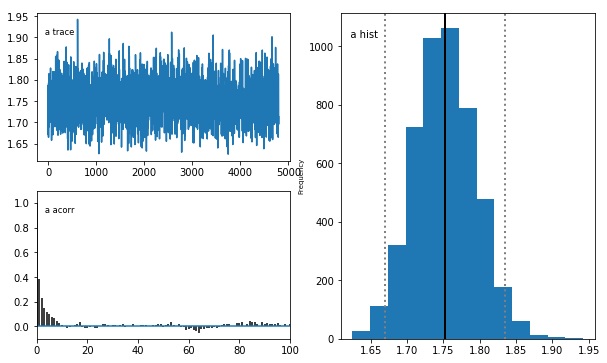

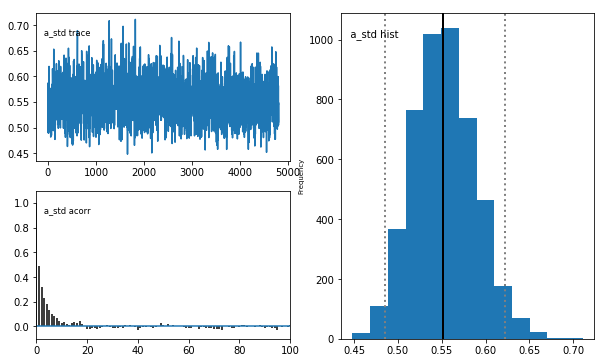

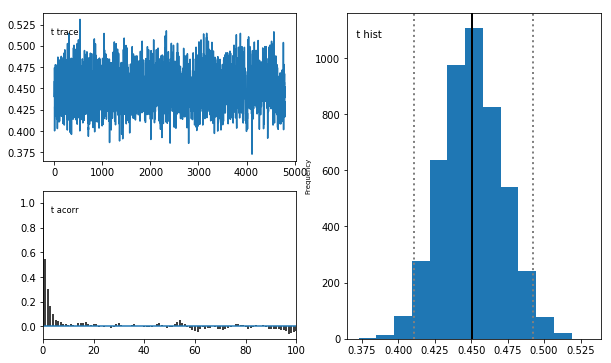

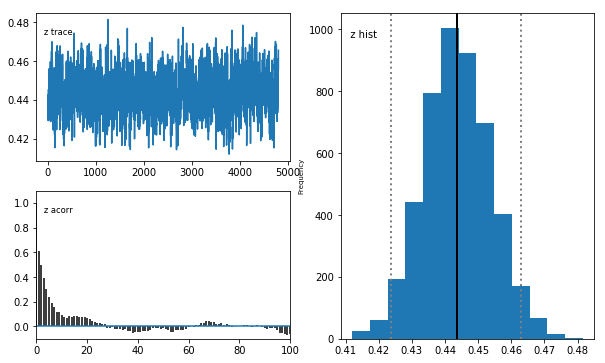

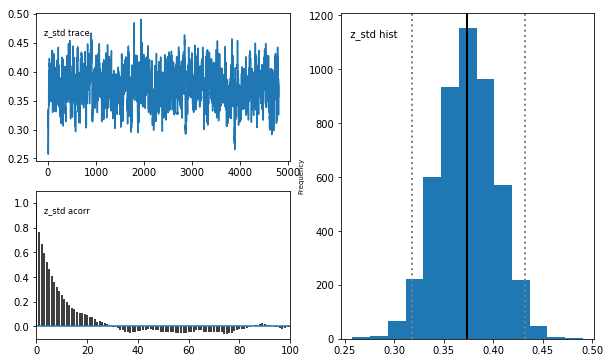

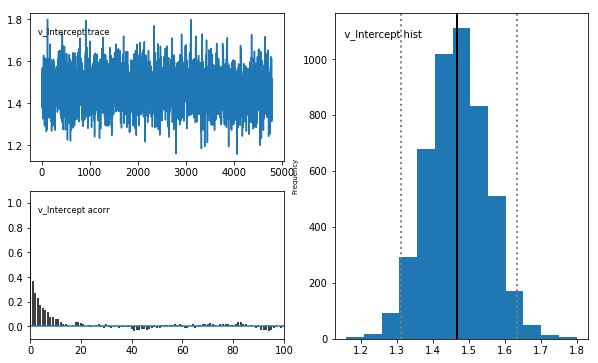

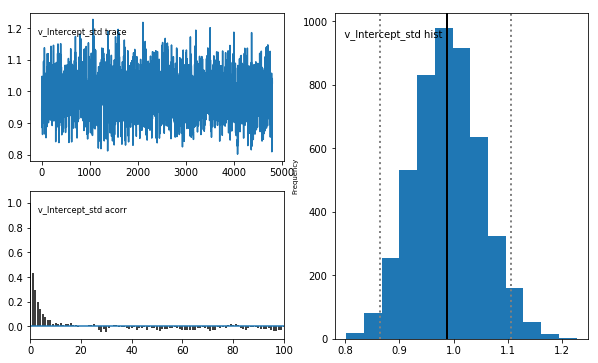

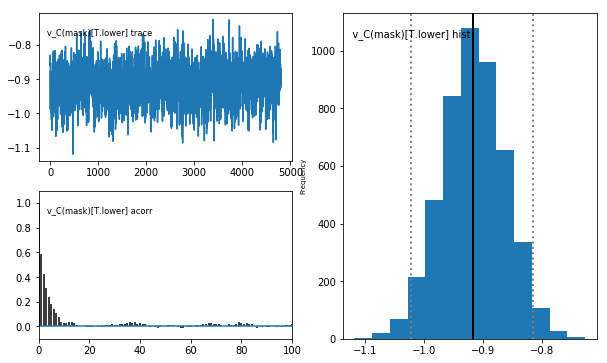

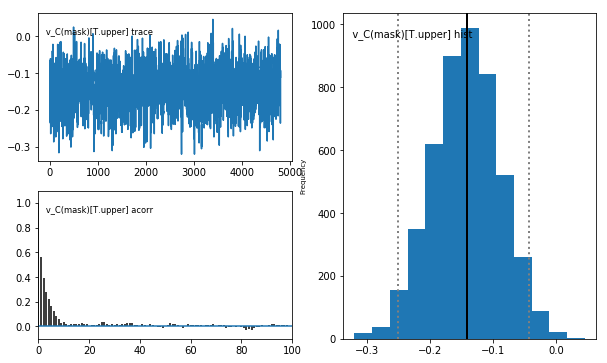

In [100]:
# run model
m_dd.sample(5000, burn=200, dbname='traces.db', db='pickle')
m_dd.print_stats()
m_dd.plot_posteriors()

/Users/Craig/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                      mean        std       2.5q       25q  \
a                                   1.7522  0.0421088    1.67212   1.72292   
a_std                             0.552845  0.0358251   0.487203  0.527772   
a_subj.02hcv424u29nd5w             2.07054    0.29142     1.5846   1.86344   
a_subj.02k2uwlhgxnumn9             1.74272   0.223778    1.36243   1.58412   
a_subj.03g7h2hzq4o3g26             2.51076   0.280932    2.02031   2.30565   
a_subj.0nmr75cysk1ae0e              1.9255   0.272576    1.46687   1.73591   
a_subj.0t8qp67pqkw36cb             1.73979   0.233363    1.34748   1.57585   
a_subj.0vfpn4uf3t031qu             1.50652   0.202914    1.16576   1.35932   
a_subj.11dsfdtym1yy5mx             1.37459   0.162267    1.08683   1.26005   
a_subj.1d3dadyu4ekqb4q             1.42392   0.186741    1.10557   1.29051   
a_subj.1mt2emp4645cbl1             2.05552   0.243002    1.63088   1.88523   
a_subj.1rst24mbtgy9rc8             1.65407   0.226286    1.27108

Plotting a_std
Plotting t
Plotting t_std
Plotting z
Plotting z_std
Plotting v_Intercept
Plotting v_Intercept_std
Plotting v_C(mask)[T.lower]
Plotting v_C(mask)[T.upper]


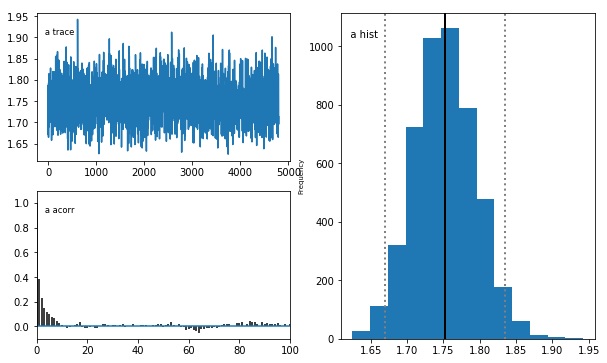

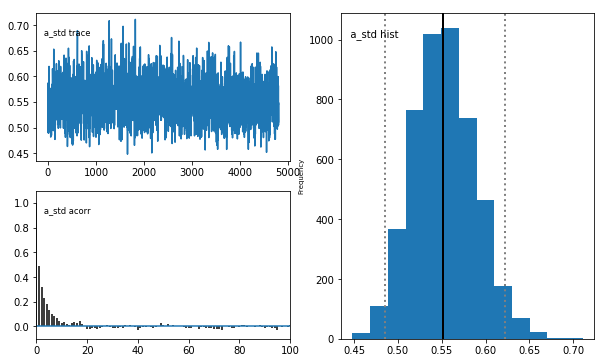

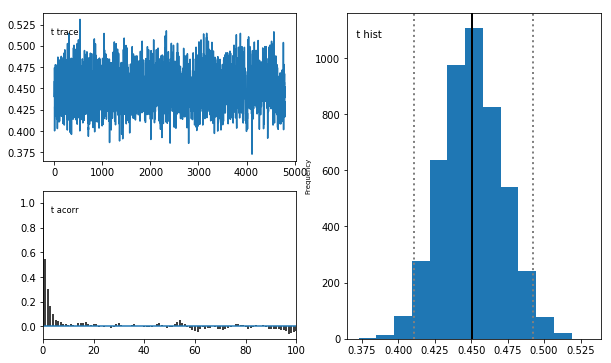

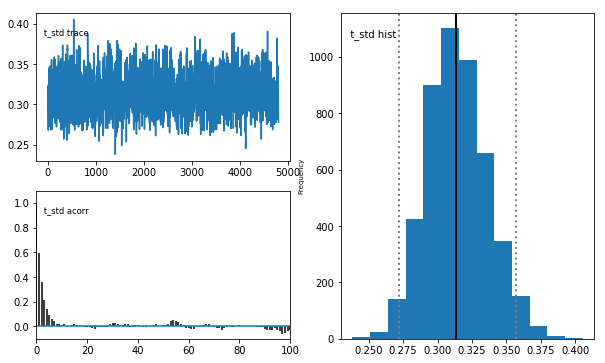

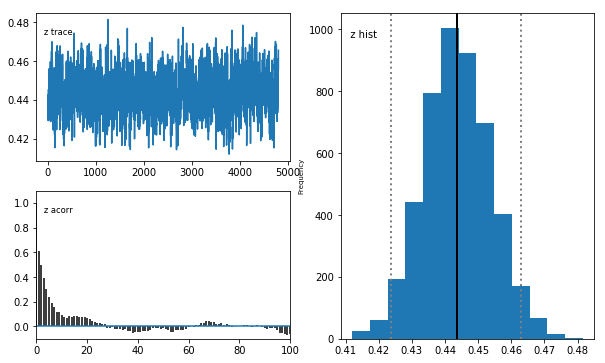

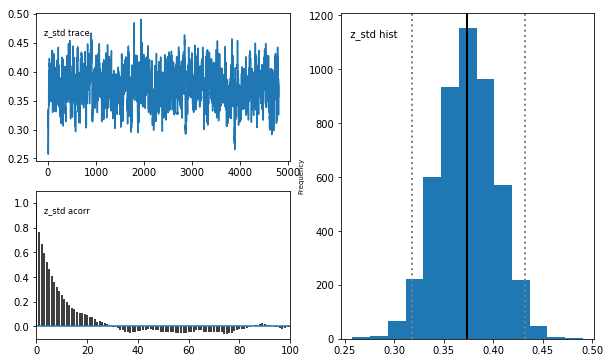

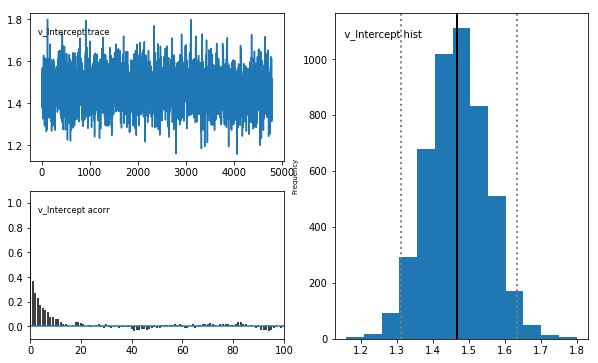

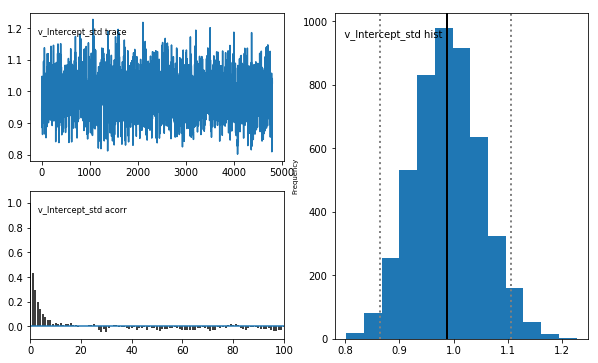

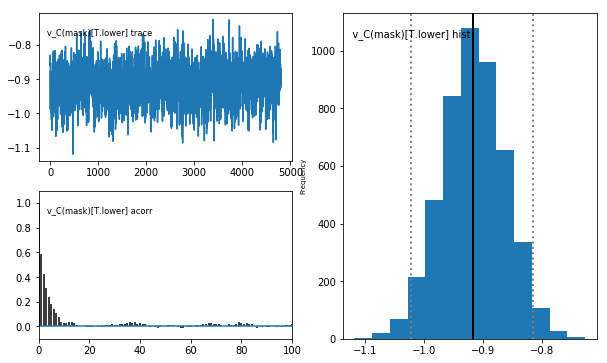

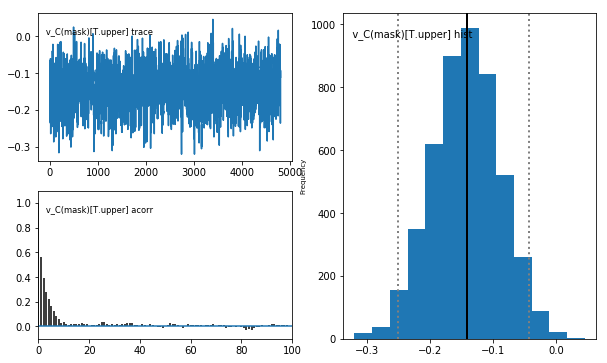

In [101]:
# save model stats
dd_stats = m_dd.gen_stats()
print(dd_stats)
# dd_stats.to_csv('_maskFalseNegatives/dd_5000/faceMask_hddm_faceRatings_maskFalseNegatives_dd_5000.csv', index=True)

# save model posterior plots
# m_dd.plot_posteriors(path='_maskFalseNegatives/dd_5000/_posteriors', save=True)

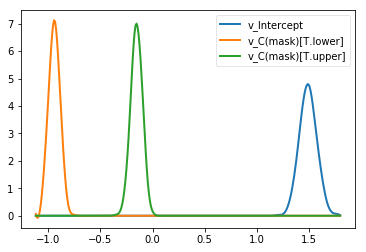

In [102]:
# plot model posteriors by mask
dd_v_none, dd_v_lower, dd_v_upper = m_dd.nodes_db.node[["v_Intercept", "v_C(mask)[T.lower]", "v_C(mask)[T.upper]"]]
hddm.analyze.plot_posterior_nodes([dd_v_none, dd_v_lower, dd_v_upper])
# plt.savefig('_maskFalseNegatives/dd_5000/faceMask_hddm_faceRatings_maskFalseNegatives_dd_5000_v_mask.pdf')

In [151]:
## estimate probabilities that mask coefficient posteriors differ from 0
# note that comparison condition coefficients (i.e. lower/upper) are *relative to* baseline condition (i.e. no mask)
# for lower/upper, =0 means no change from baseline, <0 means less than baseline, and >0 means greater than baseline
# for no mask, =0 means null drift, <0 means negative drift, and >0 means positive drift
print("P(dd_v_none < 0) = ", (dd_v_none.trace() < 0).mean())
print("P(dd_v_lower > 0) = ", (dd_v_lower.trace() > 0).mean())
print("P(dd_v_upper > 0) = ", (dd_v_upper.trace() > 0).mean())

# estimate probability that lower and upper mask coefficient posteriors differ
print("P(dd_v_lower > dd_v_upper) = ", (dd_v_lower.trace() > dd_v_upper.trace()).mean())

P(dd_v_none < 0) =  0.0
P(dd_v_lower > 0) =  0.0
P(dd_v_upper > 0) =  0.00291666666667
P(dd_v_lower > dd_v_upper) =  0.0


In [105]:
## rating happy (happy faces)
# subset dataset by emotion rating type (happy) and facial expression (happy)
hh_data = data.loc[(data['emotionRating'] == 'happy') & (data['expression'] == 'happy')]
hh_data.head(10)

subj_idx  block  faceList emotionRating  trial  \
324  gc2le9xecjp1stz      3         2         happy    329   
325  gc2le9xecjp1stz      3         2         happy    330   
332  gc2le9xecjp1stz      3         2         happy    337   
335  gc2le9xecjp1stz      3         2         happy    340   
337  gc2le9xecjp1stz      3         2         happy    342   
342  gc2le9xecjp1stz      3         2         happy    347   
345  gc2le9xecjp1stz      3         2         happy    350   
353  gc2le9xecjp1stz      3         2         happy    358   
356  gc2le9xecjp1stz      3         2         happy    361   
367  gc2le9xecjp1stz      3         2         happy    372   

                stimulus      face  model sex expression      mask  response  \
324  _faces/56_F_H_X.jpg  56_F_H_X     56   F      happy  baseline         1   
325  _faces/25_M_H_L.jpg  25_M_H_L     25   M      happy     lower         1   
332  _faces/56_F_H_U.jpg  56_F_H_U     56   F      happy     upper         1   
335  _faces/04_F_H_L.jpg  04_F_H_L      4   F      happy     lower         0   
337  _faces/25_M_H_U.jpg  25_M_H_U     25   M      happy     upper         1   
342  _faces/25_M_H_X.jpg  25_M_H_X     25   M      happy  baseline         1   
345  _faces/09_M_H_U.jpg  09_M_H_U      9   M      happy     upper         1   
353  _faces/09_M_H_X.jpg  09_M_H_X      9   M      happy  baseline         1   
356  _faces/22_F_H_U.jpg  22_F_H_U     22   F      happy     upper         1   
367  _faces/04_F_H_U.jpg  04_F_H_U      4   F      happy     upper         1   

           rt  faceAngry  faceDisgusted  faceFearful  faceHappy  faceSad  \
324  0.916780          0              0            0        100        0   
325  1.317000          0              0            0         50        0   
332  1.142010          0              0            0         50        0   
335 -0.997195          0              0            0         50        0   
337  1.010970          0              0            0         50        0   
342  1.357665          0              0            0        100        0   
345  1.282790          0              0            0         50        0   
353  1.173560          0              0            0        100        0   
356  1.034370          0              0            0         50        0   
367  1.056565          0              0            0         50        0   

     faceSurprised  
324              0  
325              0  
332              0  
335              0  
337              0  
342              0  
345              0  
353              0  
356              0  
367              0

In [106]:
# define model
m_hh = hddm.HDDMRegressor(hh_data, "v ~ C(mask)", bias=True, p_outlier=0.05)

Adding these covariates:
['v_Intercept', 'v_C(mask)[T.lower]', 'v_C(mask)[T.upper]']


 [-----------------100%-----------------] 5001 of 5000 complete in 33433.4 sec

/Users/Craig/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                       mean        std        2.5q         25q        50q        75q       97.5q       mc err
a                                   1.73024   0.414148     1.62275     1.67824    1.70827    1.74034     1.80237    0.0211464
a_std                              0.618886   0.699058    0.509062    0.558183   0.583387   0.611703    0.671636     0.033989
a_subj.02hcv424u29nd5w              1.77853   0.302294     1.28007     1.55966    1.74587    1.96483     2.43915   0.00980499
a_subj.02k2uwlhgxnumn9              1.42446   0.274658     1.01735     1.23324    1.38161    1.56813     2.07737    0.0110184
a_subj.03g7h2hzq4o3g26              3.17398   0.473831      2.4154      2.8636    3.13638    3.43299     4.13647    0.0163952
a_subj.0nmr75cysk1ae0e               1.8739   0.247245      1.4648     1.69322    1.85124    2.02265      2.4211    0.0058632
a_subj.0t8qp67pqkw36cb               1.7385   0.205346     1.38213      1.5957    1.72094    1.86189     2.18631   0.0

Plotting t
Plotting t_std
Plotting z
Plotting z_std
Plotting v_Intercept
Plotting v_Intercept_std
Plotting v_C(mask)[T.lower]
Plotting v_C(mask)[T.upper]


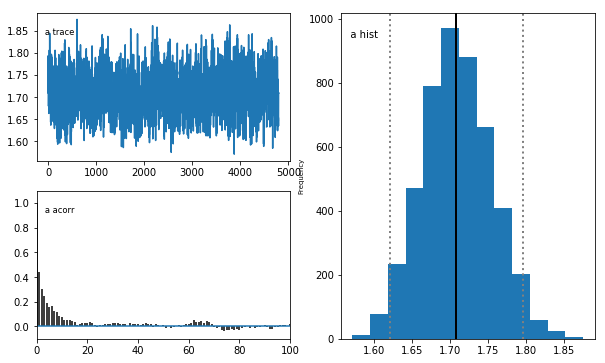

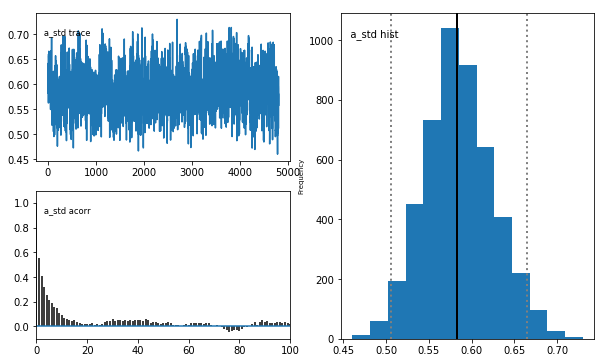

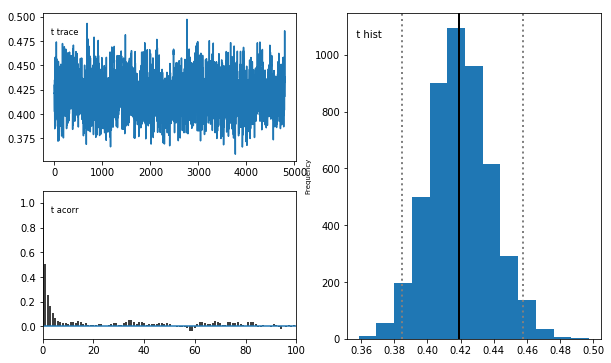

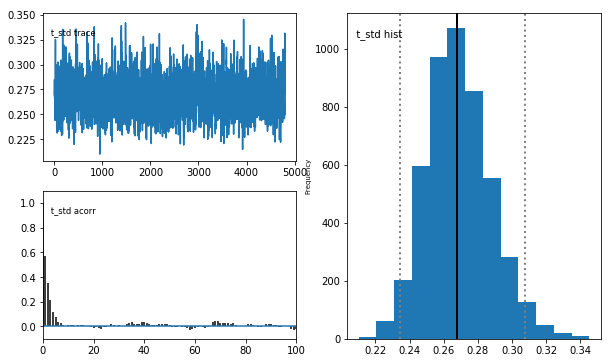

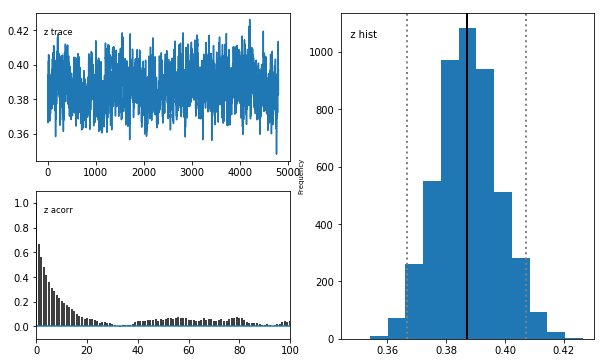

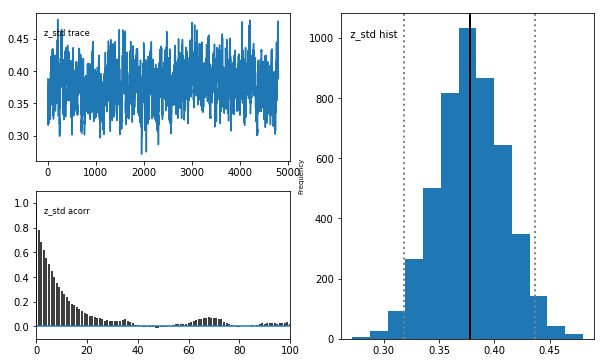

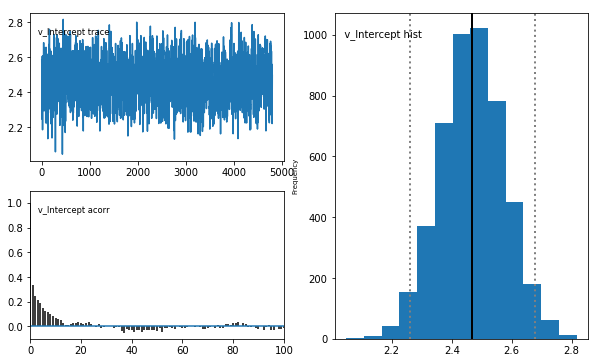

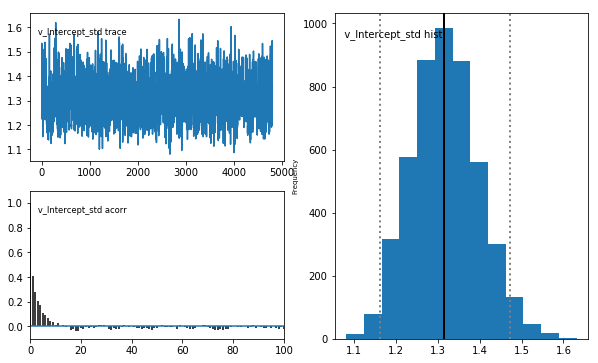

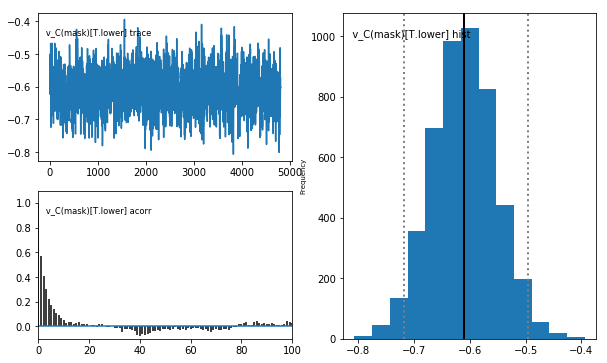

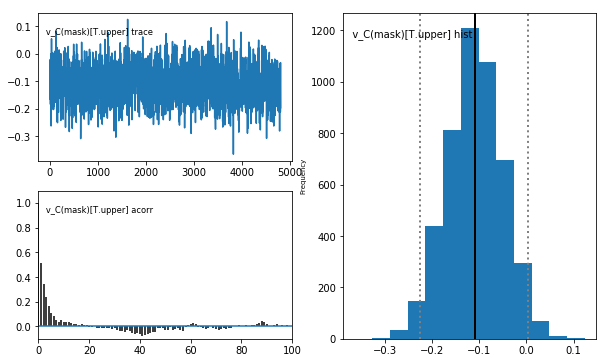

In [112]:
# run model
m_hh.sample(5000, burn=200, dbname='traces.db', db='pickle')
m_hh.print_stats()
m_hh.plot_posteriors()

/Users/Craig/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                       mean        std       2.5q       25q  \
a                                   1.73024   0.414148    1.62275   1.67824   
a_std                              0.618886   0.699058   0.509062  0.558183   
a_subj.02hcv424u29nd5w              1.77853   0.302294    1.28007   1.55966   
a_subj.02k2uwlhgxnumn9              1.42446   0.274658    1.01735   1.23324   
a_subj.03g7h2hzq4o3g26              3.17398   0.473831     2.4154    2.8636   
a_subj.0nmr75cysk1ae0e               1.8739   0.247245     1.4648   1.69322   
a_subj.0t8qp67pqkw36cb               1.7385   0.205346    1.38213    1.5957   
a_subj.0vfpn4uf3t031qu               1.0431   0.136987   0.809737   0.94732   
a_subj.11dsfdtym1yy5mx                1.889   0.183695    1.56534   1.75963   
a_subj.1d3dadyu4ekqb4q              1.21689   0.168898   0.935394   1.09425   
a_subj.1mt2emp4645cbl1              2.69842   0.379031    2.06524   2.42405   
a_subj.1rst24mbtgy9rc8              1.44605   0.2203

Plotting a_std
Plotting t
Plotting t_std
Plotting z
Plotting z_std
Plotting v_Intercept
Plotting v_Intercept_std
Plotting v_C(mask)[T.lower]
Plotting v_C(mask)[T.upper]


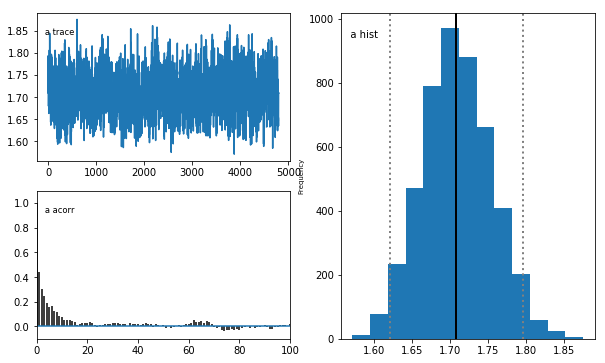

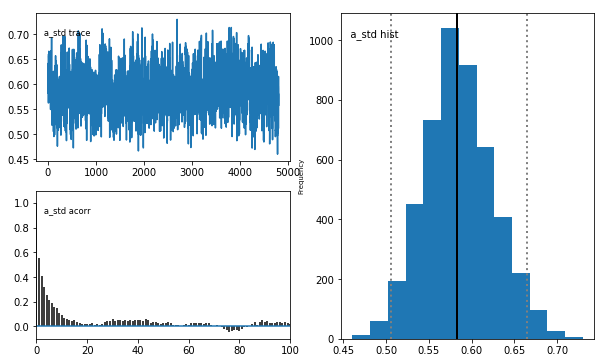

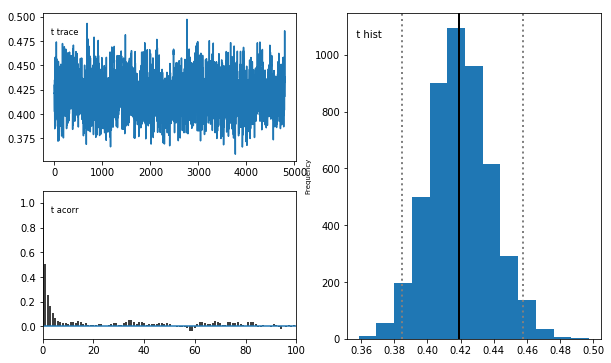

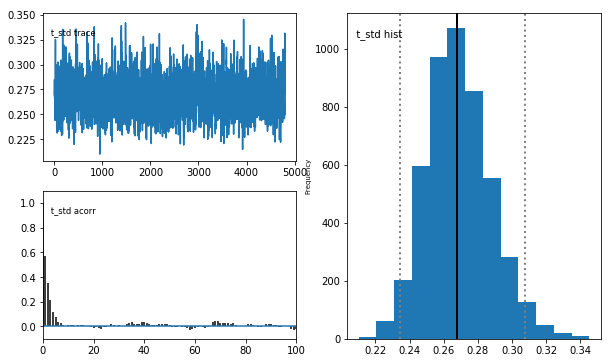

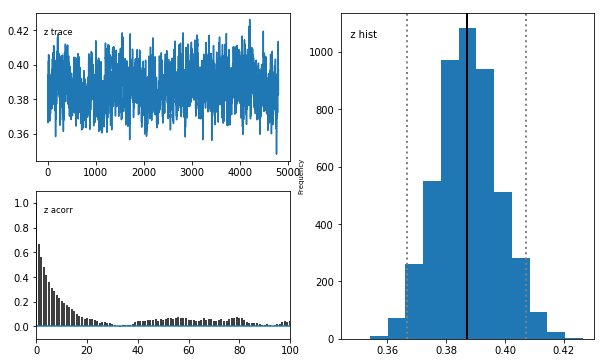

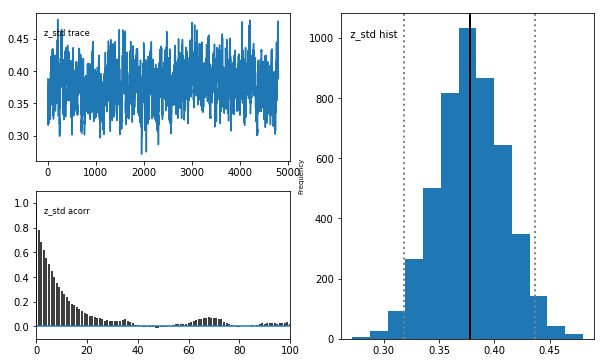

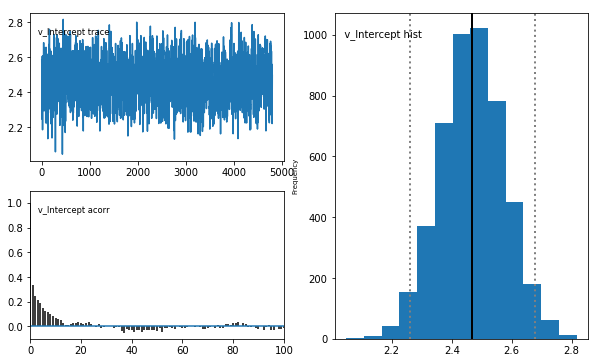

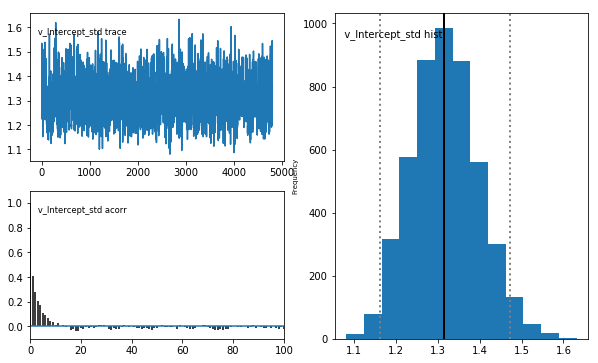

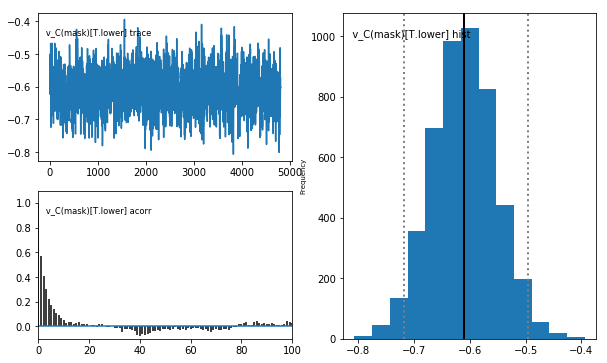

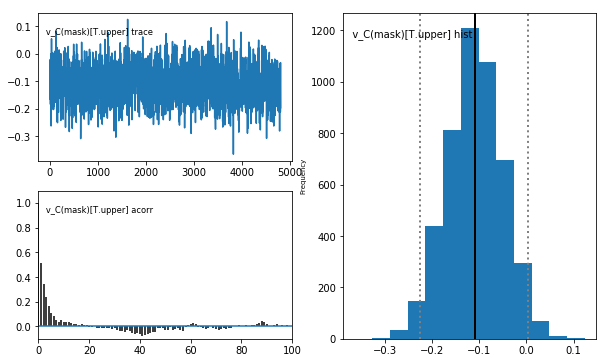

In [113]:
# save model stats
hh_stats = m_hh.gen_stats()
print(hh_stats)
# hh_stats.to_csv('_maskFalseNegatives/hh_5000/faceMask_hddm_faceRatings_maskFalseNegatives_hh_5000.csv', index=True)

# save model posterior plots
# m_hh.plot_posteriors(path='_maskFalseNegatives/hh_5000/_posteriors', save=True)

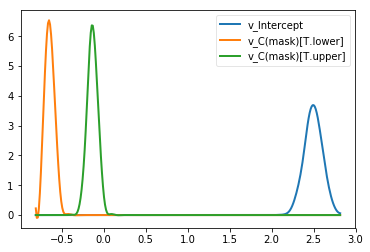

In [114]:
# plot model posteriors by mask
hh_v_none, hh_v_lower, hh_v_upper = m_hh.nodes_db.node[["v_Intercept", "v_C(mask)[T.lower]", "v_C(mask)[T.upper]"]]
hddm.analyze.plot_posterior_nodes([hh_v_none, hh_v_lower, hh_v_upper])
# plt.savefig('_maskFalseNegatives/hh_5000/faceMask_hddm_faceRatings_maskFalseNegatives_hh_5000_v_mask.pdf')

In [152]:
## estimate probabilities that mask coefficient posteriors differ from 0
# note that comparison condition coefficients (i.e. lower/upper) are *relative to* baseline condition (i.e. no mask)
# for lower/upper, =0 means no change from baseline, <0 means less than baseline, and >0 means greater than baseline
# for no mask, =0 means null drift, <0 means negative drift, and >0 means positive drift
print("P(hh_v_none < 0) = ", (hh_v_none.trace() < 0).mean())
print("P(hh_v_lower > 0) = ", (hh_v_lower.trace() > 0).mean())
print("P(hh_v_upper > 0) = ", (hh_v_upper.trace() > 0).mean())

# estimate probability that lower and upper mask coefficient posteriors differ
print("P(hh_v_lower > hh_v_upper) = ", (hh_v_lower.trace() > hh_v_upper.trace()).mean())

P(hh_v_none < 0) =  0.0
P(hh_v_lower > 0) =  0.0
P(hh_v_upper > 0) =  0.0289583333333
P(hh_v_lower > hh_v_upper) =  0.0


In [107]:
## rating fearful (fearful faces)
# subset dataset by emotion rating type (fearful) and facial expression (fearful)
ff_data = data.loc[(data['emotionRating'] == 'fearful') & (data['expression'] == 'fearful')]
ff_data.head(10)

subj_idx  block  faceList emotionRating  trial  \
113  gc2le9xecjp1stz      1         4       fearful    116   
120  gc2le9xecjp1stz      1         4       fearful    123   
121  gc2le9xecjp1stz      1         4       fearful    124   
124  gc2le9xecjp1stz      1         4       fearful    127   
130  gc2le9xecjp1stz      1         4       fearful    133   
132  gc2le9xecjp1stz      1         4       fearful    135   
134  gc2le9xecjp1stz      1         4       fearful    137   
145  gc2le9xecjp1stz      1         4       fearful    148   
146  gc2le9xecjp1stz      1         4       fearful    149   
148  gc2le9xecjp1stz      1         4       fearful    151   

                stimulus      face  model sex expression      mask  response  \
113  _faces/71_M_F_X.jpg  71_M_F_X     71   M    fearful  baseline         1   
120  _faces/33_M_F_L.jpg  33_M_F_L     33   M    fearful     lower         0   
121  _faces/33_M_F_X.jpg  33_M_F_X     33   M    fearful  baseline         0   
124  _faces/31_F_F_U.jpg  31_F_F_U     31   F    fearful     upper         0   
130  _faces/14_F_F_L.jpg  14_F_F_L     14   F    fearful     lower         0   
132  _faces/31_F_F_L.jpg  31_F_F_L     31   F    fearful     lower         0   
134  _faces/20_M_F_X.jpg  20_M_F_X     20   M    fearful  baseline         0   
145  _faces/14_F_F_X.jpg  14_F_F_X     14   F    fearful  baseline         1   
146  _faces/33_M_F_U.jpg  33_M_F_U     33   M    fearful     upper         1   
148  _faces/20_M_F_U.jpg  20_M_F_U     20   M    fearful     upper         0   

           rt  faceAngry  faceDisgusted  faceFearful  faceHappy  faceSad  \
113  1.198005          0              0          100          0        0   
120 -1.027245          0              0           50          0        0   
121 -0.981540          0              0          100          0        0   
124 -0.877285          0              0           50          0        0   
130 -1.261640          0              0           50          0        0   
132 -0.848280          0              0           50          0        0   
134 -1.143630          0              0          100          0        0   
145  0.980660          0              0          100          0        0   
146  1.322030          0              0           50          0        0   
148 -7.975950          0              0           50          0        0   

     faceSurprised  
113              0  
120              0  
121              0  
124              0  
130              0  
132              0  
134              0  
145              0  
146              0  
148              0

In [109]:
# drop any subjects missing columns in design matrix to make model run (otherwise produces error)
ff_data = ff_data[(ff_data.subj_idx != '7chb1ucy8l7g29z') & (ff_data.subj_idx != 'ygpcur698h4dcw5')]

In [110]:
# define model
m_ff = hddm.HDDMRegressor(ff_data, "v ~ C(mask)", bias=True, p_outlier=0.05)

Adding these covariates:
['v_Intercept', 'v_C(mask)[T.lower]', 'v_C(mask)[T.upper]']


/Users/Craig/anaconda3/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 5001 of 5000 complete in 31565.9 sec

/Users/Craig/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                        mean         std        2.5q         25q          50q        75q      97.5q       mc err
a                                    1.72966   0.0390919     1.65212     1.70388      1.72914    1.75541    1.80752  0.000985188
a_std                               0.521541   0.0336518    0.457182    0.498933     0.520131   0.542874   0.590439  0.000995456
a_subj.02hcv424u29nd5w               2.32911    0.337641     1.76993     2.09172      2.28772    2.52516    3.10651   0.00855367
a_subj.02k2uwlhgxnumn9               1.73956    0.232454     1.34635     1.57433      1.71698    1.88865    2.26563   0.00615211
a_subj.03g7h2hzq4o3g26               2.56632    0.266574      2.0988     2.37943      2.54722    2.73031    3.13975   0.00586756
a_subj.0nmr75cysk1ae0e               2.25281    0.263776     1.80023     2.06447      2.22755    2.41984    2.82537   0.00573207
a_subj.0t8qp67pqkw36cb               1.72472     0.18473     1.39649     1.59493      1.71141    

Plotting t
Plotting t_std
Plotting z
Plotting z_std
Plotting v_Intercept
Plotting v_Intercept_std
Plotting v_C(mask)[T.lower]
Plotting v_C(mask)[T.upper]


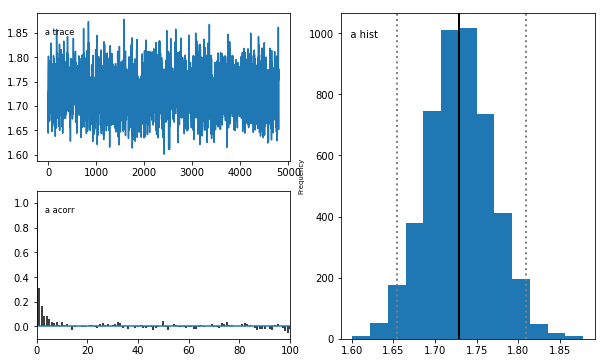

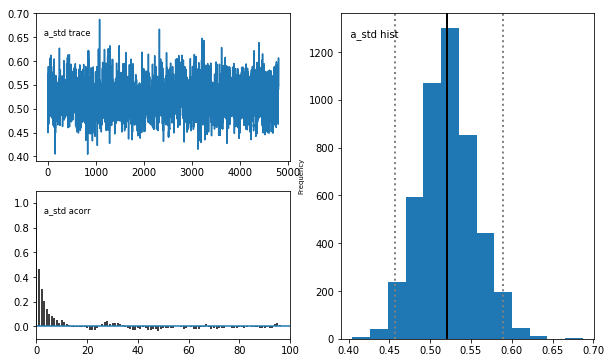

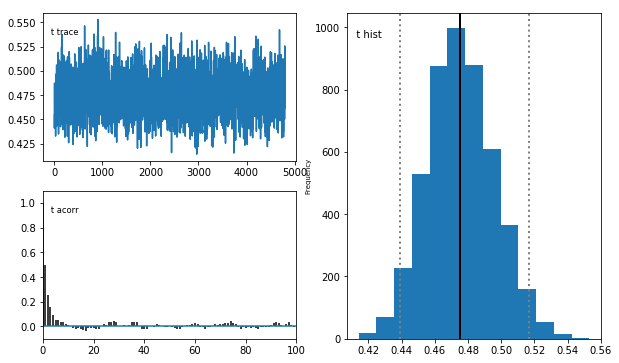

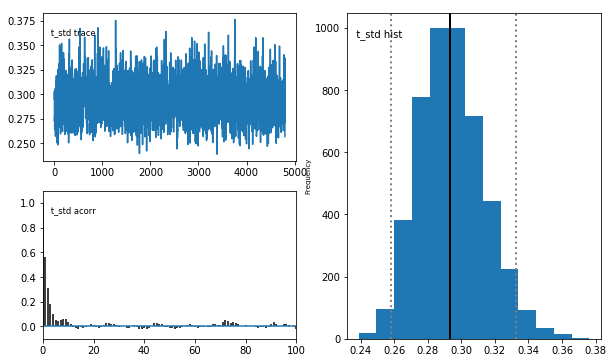

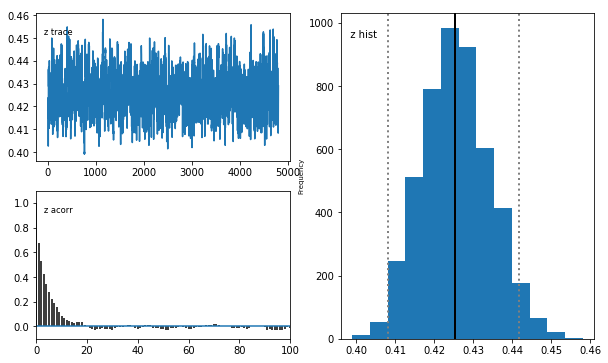

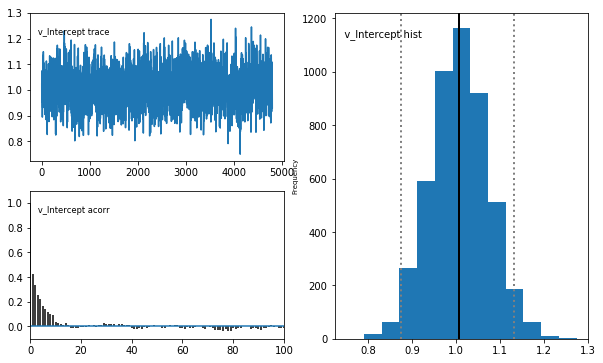

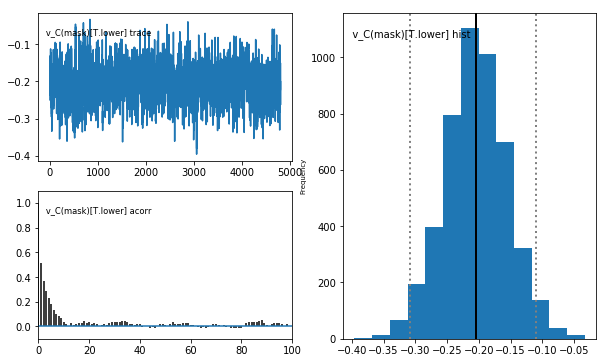

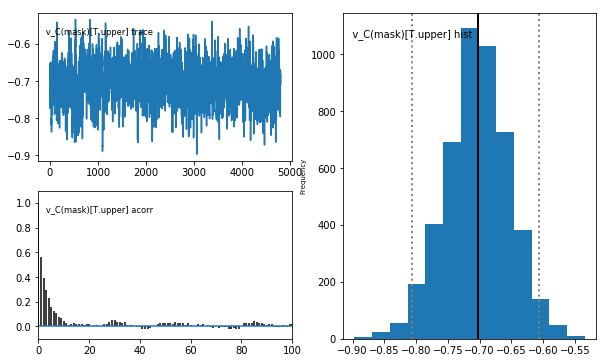

In [117]:
# run model
m_ff.sample(5000, burn=200, dbname='traces.db', db='pickle')
m_ff.print_stats()
m_ff.plot_posteriors()

/Users/Craig/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                        mean        std       2.5q       25q  \
a                                    1.72966  0.0390919    1.65212   1.70388   
a_std                               0.521541  0.0336518   0.457182  0.498933   
a_subj.02hcv424u29nd5w               2.32911   0.337641    1.76993   2.09172   
a_subj.02k2uwlhgxnumn9               1.73956   0.232454    1.34635   1.57433   
a_subj.03g7h2hzq4o3g26               2.56632   0.266574     2.0988   2.37943   
a_subj.0nmr75cysk1ae0e               2.25281   0.263776    1.80023   2.06447   
a_subj.0t8qp67pqkw36cb               1.72472    0.18473    1.39649   1.59493   
a_subj.0vfpn4uf3t031qu               1.23593   0.149117   0.976946   1.13191   
a_subj.11dsfdtym1yy5mx               1.84001   0.216913    1.46685   1.68616   
a_subj.1d3dadyu4ekqb4q               1.44968   0.234631     1.0697   1.28126   
a_subj.1mt2emp4645cbl1               2.06241   0.383003     1.4664    1.7884   
a_subj.1rst24mbtgy9rc8               1.5

Plotting a_std
Plotting t
Plotting t_std
Plotting z
Plotting z_std
Plotting v_Intercept
Plotting v_Intercept_std
Plotting v_C(mask)[T.lower]
Plotting v_C(mask)[T.upper]


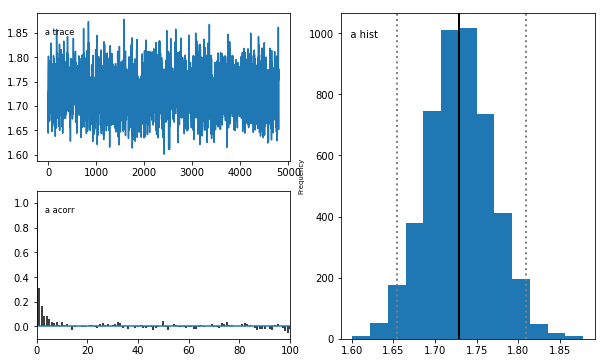

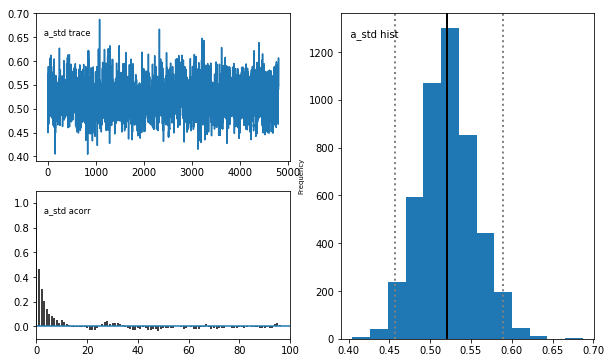

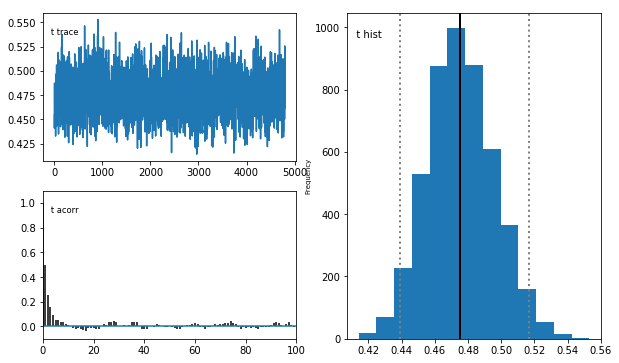

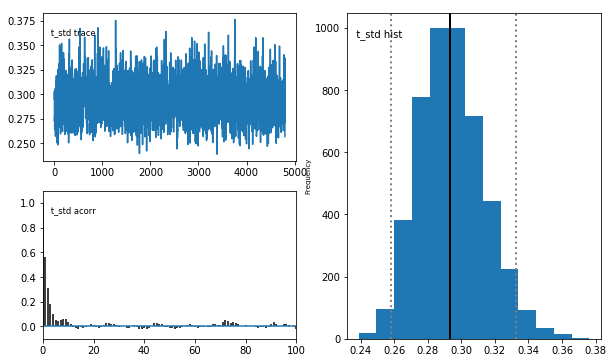

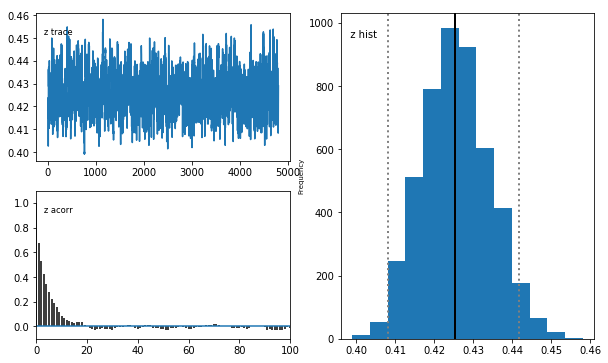

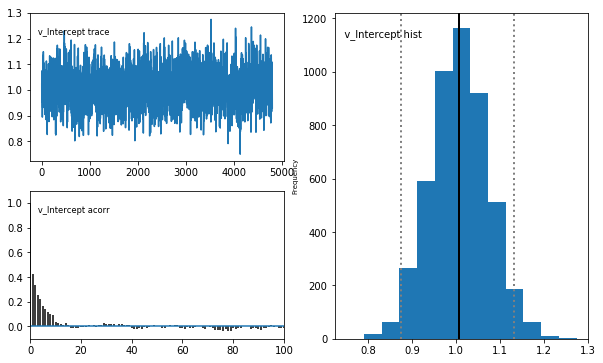

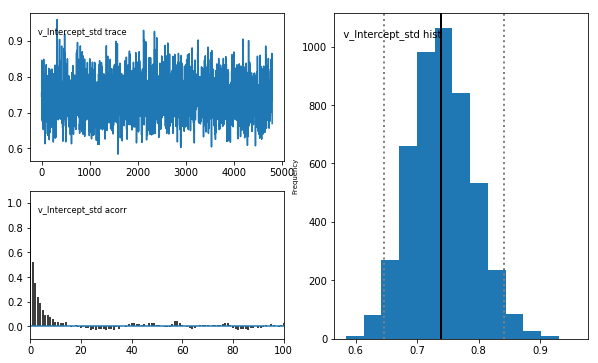

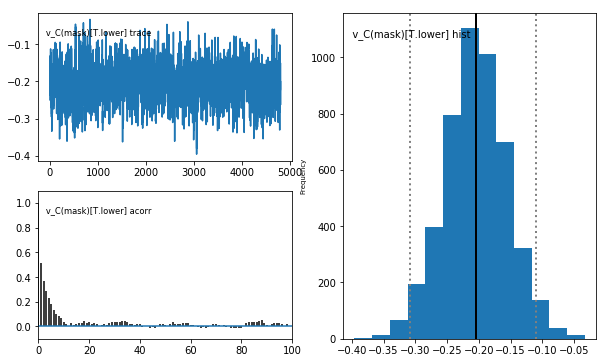

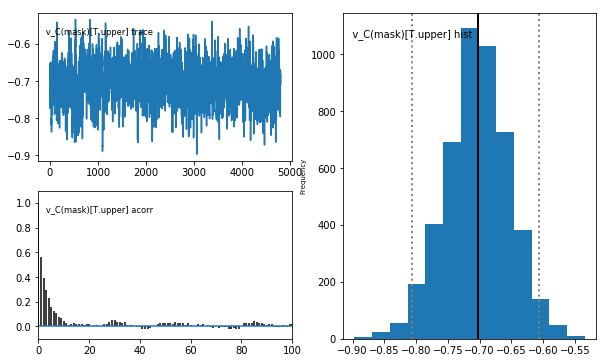

In [119]:
# save model stats
ff_stats = m_ff.gen_stats()
print(ff_stats)
# ff_stats.to_csv('_maskFalseNegatives/ff_5000/faceMask_hddm_faceRatings_maskFalseNegatives_ff_5000.csv', index=True)

# save model posterior plots
# m_ff.plot_posteriors(path='_maskFalseNegatives/ff_5000/_posteriors', save=True)

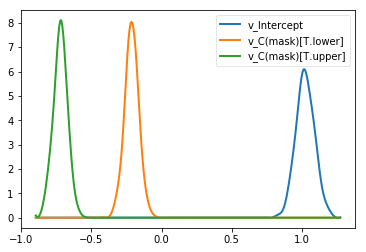

In [120]:
# plot model posteriors by mask
ff_v_none, ff_v_lower, ff_v_upper = m_ff.nodes_db.node[["v_Intercept", "v_C(mask)[T.lower]", "v_C(mask)[T.upper]"]]
hddm.analyze.plot_posterior_nodes([ff_v_none, ff_v_lower, ff_v_upper])
# plt.savefig('_maskFalseNegatives/ff_5000/faceMask_hddm_faceRatings_maskFalseNegatives_ff_5000_v_mask.pdf')

In [153]:
## estimate probabilities that mask coefficient posteriors differ from 0
# note that comparison condition coefficients (i.e. lower/upper) are *relative to* baseline condition (i.e. no mask)
# for lower/upper, =0 means no change from baseline, <0 means less than baseline, and >0 means greater than baseline
# for no mask, =0 means null drift, <0 means negative drift, and >0 means positive drift
print("P(ff_v_none < 0) = ", (ff_v_none.trace() < 0).mean())
print("P(ff_v_lower > 0) = ", (ff_v_lower.trace() > 0).mean())
print("P(ff_v_upper > 0) = ", (ff_v_upper.trace() > 0).mean())

# estimate probability that lower and upper mask coefficient posteriors differ
print("P(ff_v_lower < ff_v_upper) = ", (ff_v_lower.trace() < ff_v_upper.trace()).mean())

P(ff_v_none < 0) =  0.0
P(ff_v_lower > 0) =  0.0
P(ff_v_upper > 0) =  0.0
P(ff_v_lower < ff_v_upper) =  0.0


In [128]:
## rating sad (sad faces)
# subset dataset by emotion rating type (sad) and facial expression (sad)
ss_data = data.loc[(data['emotionRating'] == 'sad') & (data['expression'] == 'sad')]
ss_data.head(10)

subj_idx  block  faceList emotionRating  trial  \
212  gc2le9xecjp1stz      2         1           sad    216   
213  gc2le9xecjp1stz      2         1           sad    217   
221  gc2le9xecjp1stz      2         1           sad    225   
227  gc2le9xecjp1stz      2         1           sad    231   
231  gc2le9xecjp1stz      2         1           sad    236   
242  gc2le9xecjp1stz      2         1           sad    247   
254  gc2le9xecjp1stz      2         1           sad    259   
262  gc2le9xecjp1stz      2         1           sad    267   
263  gc2le9xecjp1stz      2         1           sad    268   
272  gc2le9xecjp1stz      2         1           sad    277   

                stimulus      face  model sex expression      mask  response  \
212  _faces/71_M_S_X.jpg  71_M_S_X     71   M        sad  baseline         1   
213  _faces/33_M_S_L.jpg  33_M_S_L     33   M        sad     lower         1   
221  _faces/14_F_S_U.jpg  14_F_S_U     14   F        sad     upper         1   
227  _faces/20_M_S_X.jpg  20_M_S_X     20   M        sad  baseline         1   
231  _faces/14_F_S_X.jpg  14_F_S_X     14   F        sad  baseline         0   
242  _faces/20_M_S_L.jpg  20_M_S_L     20   M        sad     lower         1   
254  _faces/61_F_S_L.jpg  61_F_S_L     61   F        sad     lower         0   
262  _faces/33_M_S_X.jpg  33_M_S_X     33   M        sad  baseline         1   
263  _faces/20_M_S_U.jpg  20_M_S_U     20   M        sad     upper         0   
272  _faces/31_F_S_L.jpg  31_F_S_L     31   F        sad     lower         1   

           rt  faceAngry  faceDisgusted  faceFearful  faceHappy  faceSad  \
212  1.773800          0              0            0          0      100   
213  1.060740          0              0            0          0       50   
221  1.006610          0              0            0          0       50   
227  2.031125          0              0            0          0      100   
231 -1.401055          0              0            0          0      100   
242  0.914565          0              0            0          0       50   
254 -0.806490          0              0            0          0       50   
262  0.966425          0              0            0          0      100   
263 -0.866050          0              0            0          0       50   
272  1.286905          0              0            0          0       50   

     faceSurprised  
212              0  
213              0  
221              0  
227              0  
231              0  
242              0  
254              0  
262              0  
263              0  
272              0

In [130]:
# drop any subjects missing columns in design matrix (otherwise produces error)
ss_data = ss_data[(ss_data.subj_idx != 'coppe66xbmkn6yj') & (ss_data.subj_idx != 'rc7s6vgpycw73ap') & (ss_data.subj_idx != 'ygpcur698h4dcw5')]

In [131]:
# define model
m_ss = hddm.HDDMRegressor(ss_data, "v ~ C(mask)", bias=True, p_outlier=0.05)

Adding these covariates:
['v_Intercept', 'v_C(mask)[T.lower]', 'v_C(mask)[T.upper]']


 [-----------------100%-----------------] 5001 of 5000 complete in 31343.9 sec

/Users/Craig/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                        mean        std        2.5q         25q        50q        75q      97.5q       mc err
a                                    1.71388   0.436392     1.62007     1.66834    1.69669    1.72404    1.78112    0.0173875
a_std                               0.548782   0.499572    0.463528    0.503738   0.526499   0.551128   0.601356    0.0209186
a_subj.02hcv424u29nd5w                2.7766   0.316077     2.23985     2.54664    2.75262    2.97149    3.46725   0.00765146
a_subj.02k2uwlhgxnumn9               2.35277    0.36388     1.74471     2.09277     2.3143    2.57382     3.1574    0.0107324
a_subj.03g7h2hzq4o3g26               1.79493    0.21098     1.44307     1.64294    1.77522    1.92434    2.25844   0.00522369
a_subj.0nmr75cysk1ae0e               2.51888   0.367293     1.91377     2.25894    2.48295    2.73924    3.31901    0.0103071
a_subj.0t8qp67pqkw36cb                1.5854   0.240892     1.19478     1.40925    1.55498    1.72784    2.13573   0.0

Plotting t
Plotting t_std
Plotting z
Plotting z_std
Plotting v_Intercept
Plotting v_Intercept_std
Plotting v_C(mask)[T.lower]
Plotting v_C(mask)[T.upper]


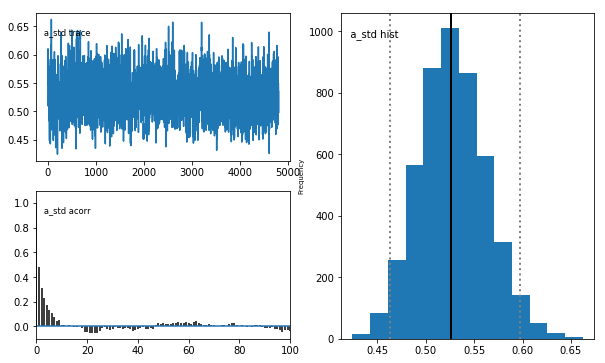

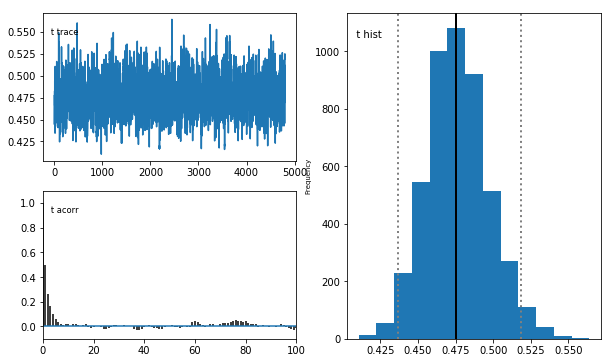

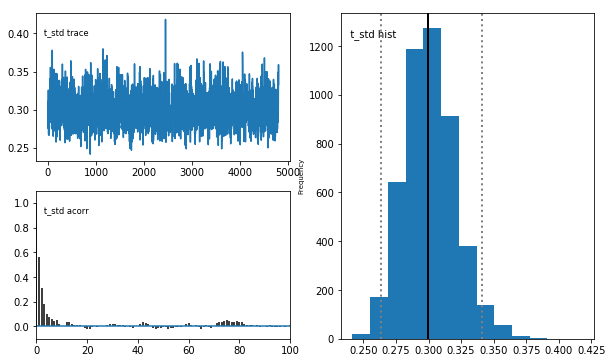

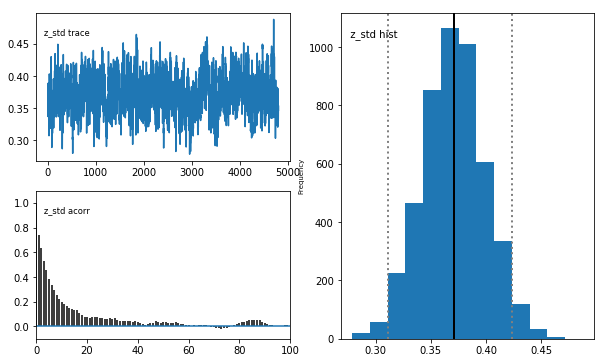

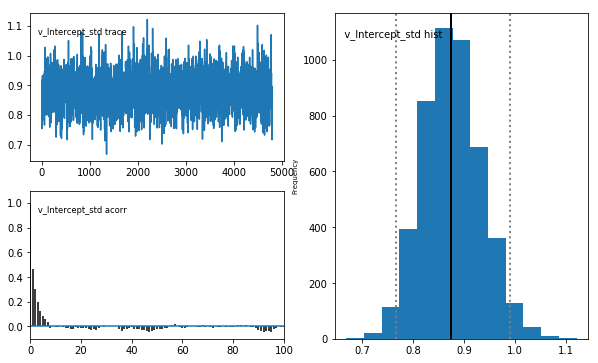

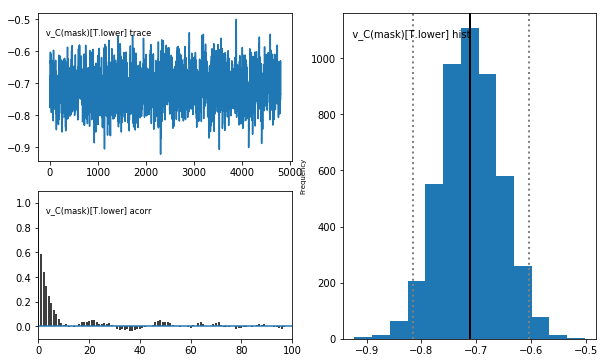

In [137]:
# run model
m_ss.sample(5000, burn=200, dbname='traces.db', db='pickle')
m_ss.print_stats()
m_ss.plot_posteriors()

/Users/Craig/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                      mean        std      2.5q         25q  \
a                                  1.71388   0.436392   1.62007     1.66834   
a_std                             0.548782   0.499572  0.463528    0.503738   
a_subj.02hcv424u29nd5w              2.7766   0.316077   2.23985     2.54664   
a_subj.02k2uwlhgxnumn9             2.35277    0.36388   1.74471     2.09277   
a_subj.03g7h2hzq4o3g26             1.79493    0.21098   1.44307     1.64294   
a_subj.0nmr75cysk1ae0e             2.51888   0.367293   1.91377     2.25894   
a_subj.0t8qp67pqkw36cb              1.5854   0.240892   1.19478     1.40925   
a_subj.0vfpn4uf3t031qu             1.29596    0.15763   1.02514     1.18795   
a_subj.11dsfdtym1yy5mx             1.53478   0.170386   1.24694     1.41459   
a_subj.1d3dadyu4ekqb4q             2.17947   0.393769   1.55325      1.8948   
a_subj.1mt2emp4645cbl1             1.71818   0.200463   1.38717     1.57389   
a_subj.1rst24mbtgy9rc8             1.83252   0.21022

Plotting a_std
Plotting t
Plotting t_std
Plotting z
Plotting z_std
Plotting v_Intercept
Plotting v_Intercept_std
Plotting v_C(mask)[T.lower]
Plotting v_C(mask)[T.upper]


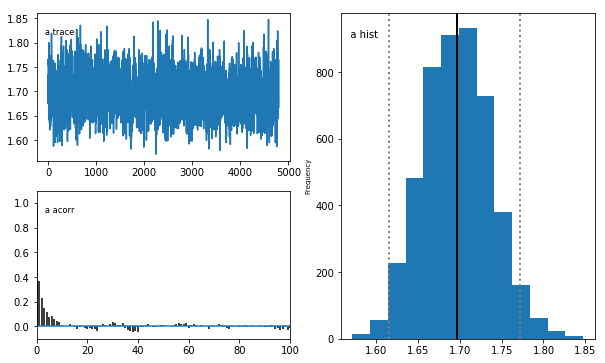

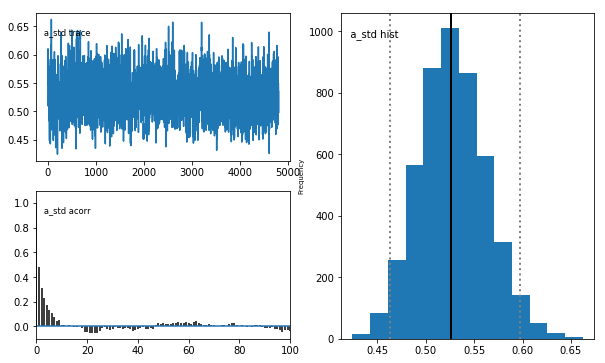

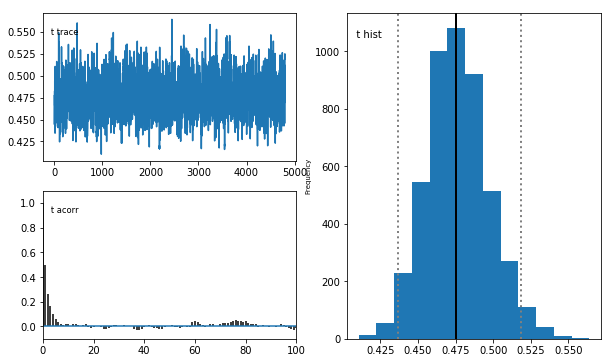

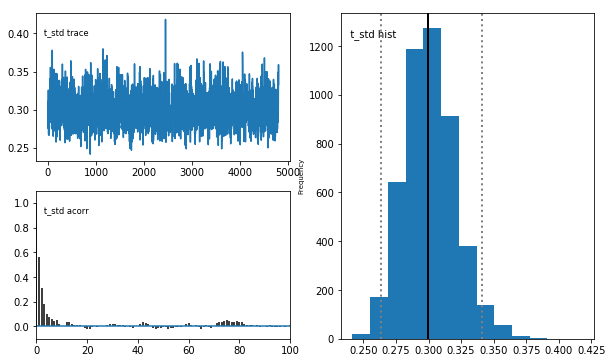

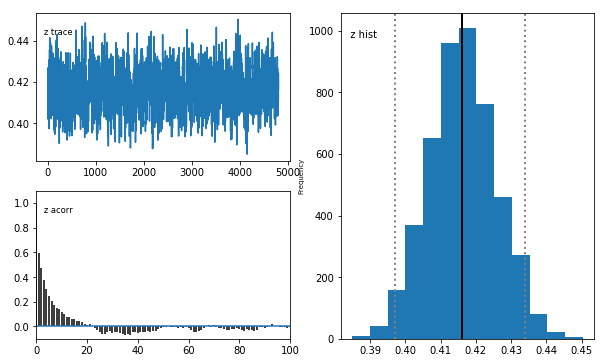

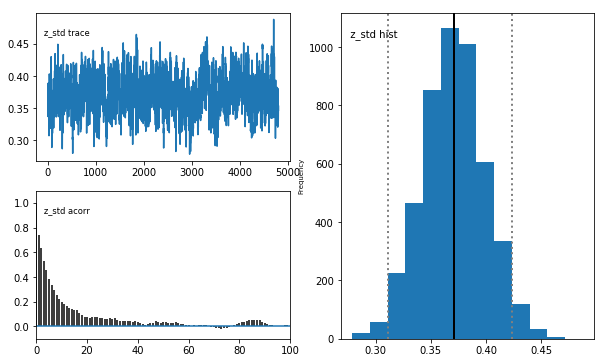

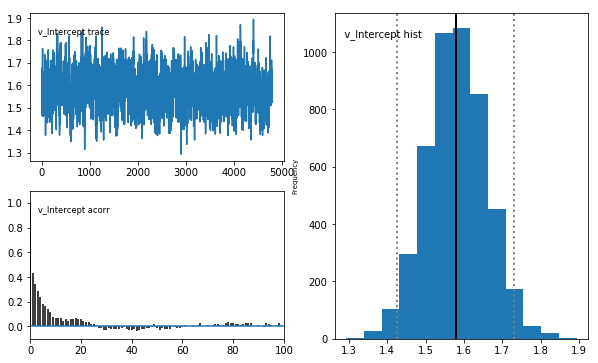

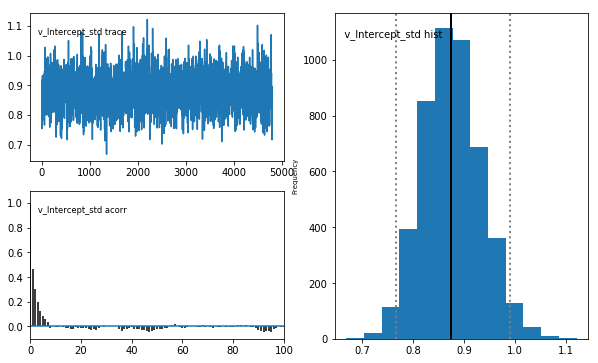

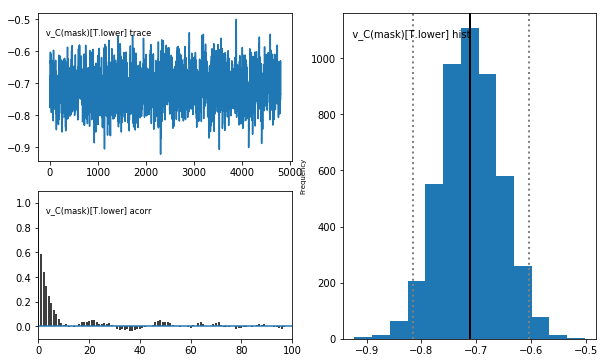

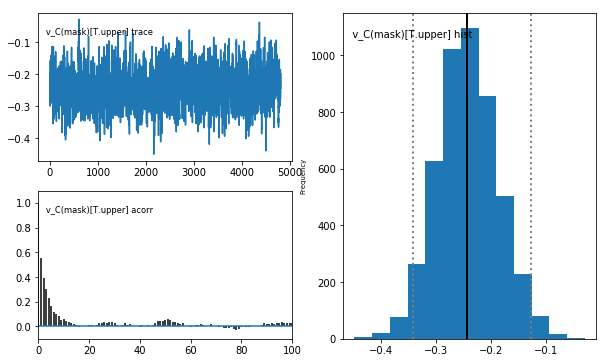

In [138]:
# save model stats
ss_stats = m_ss.gen_stats()
print(ss_stats)
# ss_stats.to_csv('_maskFalseNegatives/ss_5000/faceMask_hddm_faceRatings_maskFalseNegatives_ss_5000.csv', index=True)

# save model posterior plots
# m_ss.plot_posteriors(path='_maskFalseNegatives/ss_5000/_posteriors', save=True)

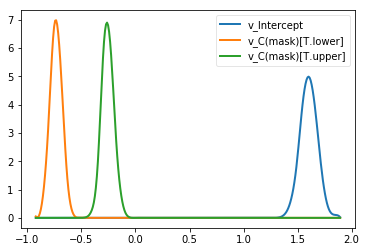

In [139]:
# plot model posteriors by mask
ss_v_none, ss_v_lower, ss_v_upper = m_ss.nodes_db.node[["v_Intercept", "v_C(mask)[T.lower]", "v_C(mask)[T.upper]"]]
hddm.analyze.plot_posterior_nodes([ss_v_none, ss_v_lower, ss_v_upper])
# plt.savefig('_maskFalseNegatives/ss_5000/faceMask_hddm_faceRatings_maskFalseNegatives_ss_5000_v_mask.pdf')

In [154]:
## estimate probabilities that mask coefficient posteriors differ from 0
# note that comparison condition coefficients (i.e. lower/upper) are *relative to* baseline condition (i.e. no mask)
# for lower/upper, =0 means no change from baseline, <0 means less than baseline, and >0 means greater than baseline
# for no mask, =0 means null drift, <0 means negative drift, and >0 means positive drift
print("P(ss_v_none < 0) = ", (ss_v_none.trace() < 0).mean())
print("P(ss_v_lower > 0) = ", (ss_v_lower.trace() > 0).mean())
print("P(ss_v_upper > 0) = ", (ss_v_upper.trace() > 0).mean())

# estimate probability that lower and upper mask coefficient posteriors differ
print("P(ss_v_lower > ss_v_upper) = ", (ss_v_lower.trace() > ss_v_upper.trace()).mean())

P(ss_v_none < 0) =  0.0
P(ss_v_lower > 0) =  0.0
P(ss_v_upper > 0) =  0.0
P(ss_v_lower > ss_v_upper) =  0.0


In [132]:
## rating surprised (surprised faces)
# subset dataset by emotion rating type (surprised) and facial expression (surprised)
rr_data = data.loc[(data['emotionRating'] == 'surprised') & (data['expression'] == 'surprised')]
rr_data.head(10)

subj_idx  block  faceList emotionRating  trial  \
556  gc2le9xecjp1stz      5         6     surprised    562   
561  gc2le9xecjp1stz      5         6     surprised    567   
562  gc2le9xecjp1stz      5         6     surprised    568   
567  gc2le9xecjp1stz      5         6     surprised    573   
568  gc2le9xecjp1stz      5         6     surprised    574   
577  gc2le9xecjp1stz      5         6     surprised    587   
582  gc2le9xecjp1stz      5         6     surprised    601   
589  gc2le9xecjp1stz      5         6     surprised    616   
599  gc2le9xecjp1stz      5         6     surprised    631   
602  gc2le9xecjp1stz      5         6     surprised    635   

                stimulus      face  model sex expression      mask  response  \
556  _faces/71_M_R_X.jpg  71_M_R_X     71   M  surprised  baseline         1   
561  _faces/14_F_R_L.jpg  14_F_R_L     14   F  surprised     lower         1   
562  _faces/61_F_R_U.jpg  61_F_R_U     61   F  surprised     upper         0   
567  _faces/20_M_R_L.jpg  20_M_R_L     20   M  surprised     lower         0   
568  _faces/33_M_R_U.jpg  33_M_R_U     33   M  surprised     upper         1   
577  _faces/14_F_R_X.jpg  14_F_R_X     14   F  surprised  baseline         0   
582  _faces/33_M_R_L.jpg  33_M_R_L     33   M  surprised     lower         1   
589  _faces/71_M_R_L.jpg  71_M_R_L     71   M  surprised     lower         0   
599  _faces/31_F_R_L.jpg  31_F_R_L     31   F  surprised     lower         1   
602  _faces/61_F_R_X.jpg  61_F_R_X     61   F  surprised  baseline         0   

           rt  faceAngry  faceDisgusted  faceFearful  faceHappy  faceSad  \
556  1.369480          0              0            0          0        0   
561  0.956305          0              0            0          0        0   
562 -1.049810          0              0            0          0        0   
567 -0.762875          0              0            0          0        0   
568  0.298050          0              0            0          0        0   
577 -0.669860          0              0            0          0        0   
582  0.172880          0              0            0          0        0   
589 -0.567105          0              0            0          0        0   
599  0.576700          0              0            0          0        0   
602 -0.336825          0              0            0          0        0   

     faceSurprised  
556            100  
561             50  
562             50  
567             50  
568             50  
577            100  
582             50  
589             50  
599             50  
602            100

In [134]:
# drop any subjects missing columns in design matrix (otherwise produces error)
rr_data = rr_data[(rr_data.subj_idx != '7chb1ucy8l7g29z')]

In [135]:
# define model
m_rr = hddm.HDDMRegressor(rr_data, "v ~ C(mask)", bias=True, p_outlier=0.05)

Adding these covariates:
['v_Intercept', 'v_C(mask)[T.lower]', 'v_C(mask)[T.upper]']


 [-----------------100%-----------------] 5001 of 5000 complete in 30855.1 sec

/Users/Craig/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                       mean        std        2.5q         25q         50q        75q      97.5q       mc err
a                                   1.68472   0.609476     1.58456     1.62932     1.65402    1.68035    1.73166    0.0299544
a_std                              0.554683    1.15347    0.440138    0.477843    0.499252   0.522606   0.571029    0.0537364
a_subj.02hcv424u29nd5w              2.18476   0.330586     1.65574     1.95416     2.15572    2.38002     2.8622    0.0100816
a_subj.02k2uwlhgxnumn9              1.42784   0.238425     1.04438     1.25803     1.39704    1.56498    1.98247   0.00827273
a_subj.03g7h2hzq4o3g26              2.79185   0.328455     2.23218     2.55782     2.76672    2.99234    3.51502   0.00764275
a_subj.0nmr75cysk1ae0e              2.00245   0.228417     1.61939     1.84046     1.98772    2.13975    2.49077   0.00505492
a_subj.0t8qp67pqkw36cb              1.95989   0.381747     1.34327     1.69297     1.92259    2.18024    2.85186    0.

Plotting t
Plotting t_std
Plotting z
Plotting z_std
Plotting v_Intercept
Plotting v_Intercept_std
Plotting v_C(mask)[T.lower]
Plotting v_C(mask)[T.upper]


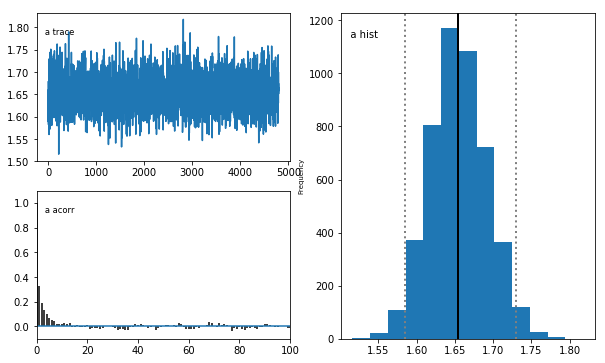

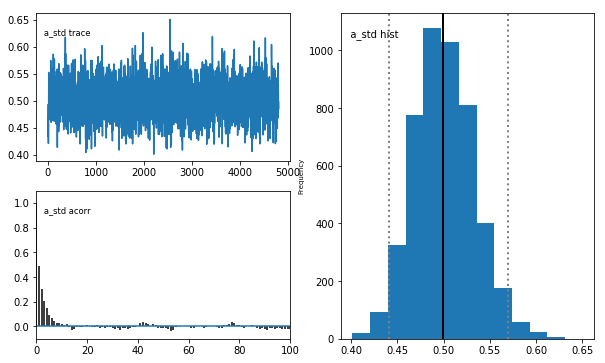

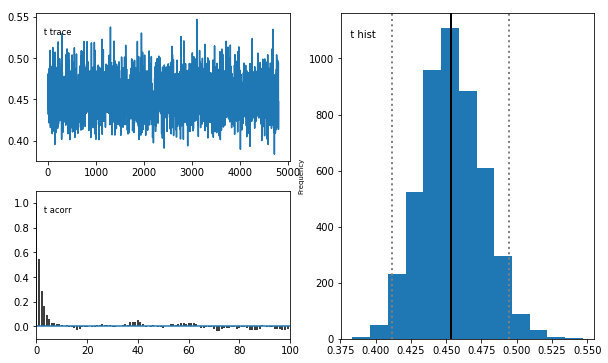

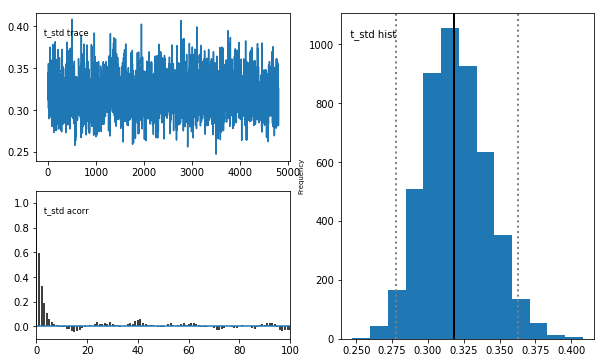

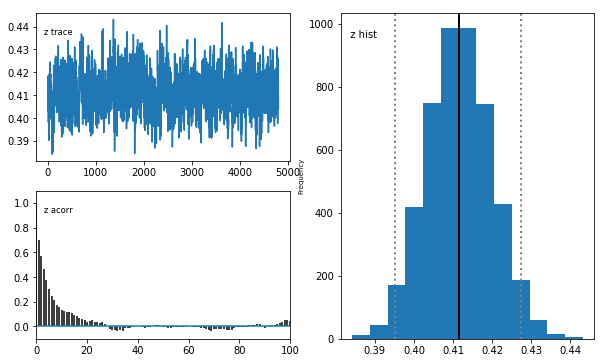

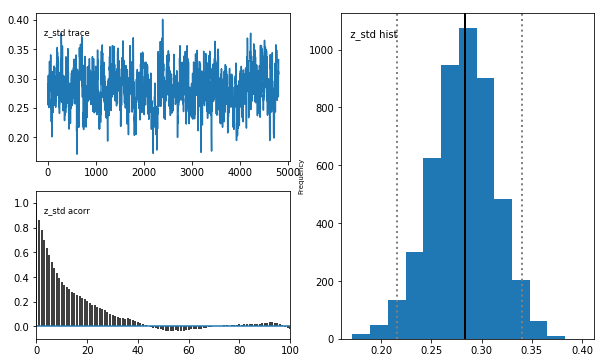

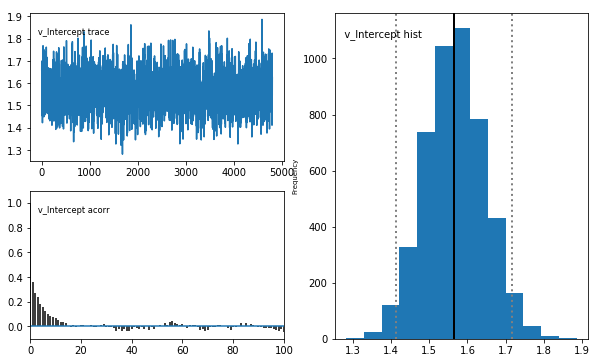

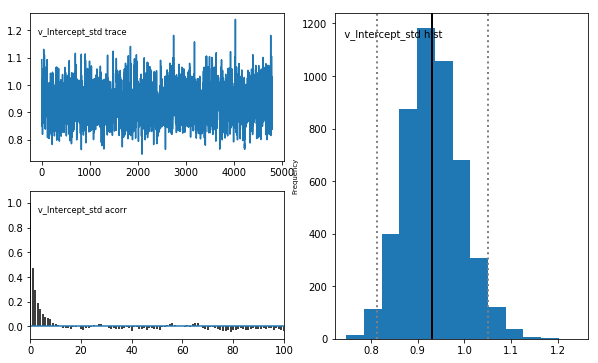

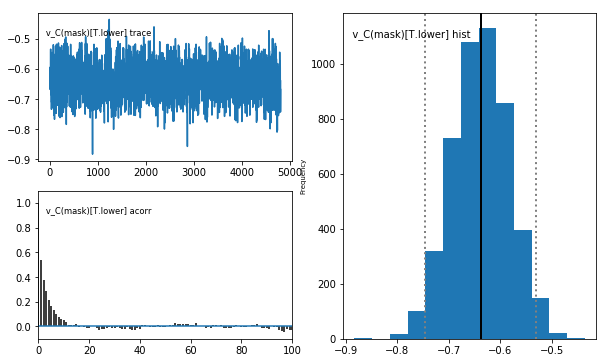

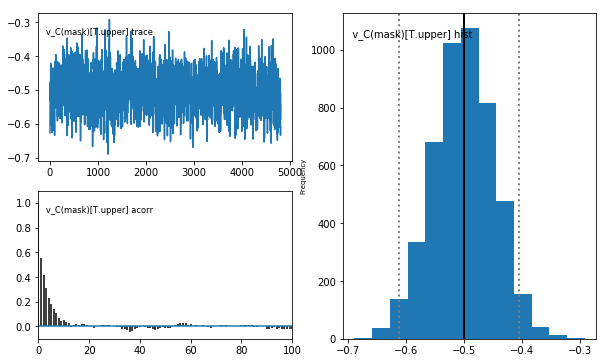

In [142]:
# run model
m_rr.sample(5000, burn=200, dbname='traces.db', db='pickle')
m_rr.print_stats()
m_rr.plot_posteriors()

/Users/Craig/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                       mean        std      2.5q         25q  \
a                                   1.68472   0.609476   1.58456     1.62932   
a_std                              0.554683    1.15347  0.440138    0.477843   
a_subj.02hcv424u29nd5w              2.18476   0.330586   1.65574     1.95416   
a_subj.02k2uwlhgxnumn9              1.42784   0.238425   1.04438     1.25803   
a_subj.03g7h2hzq4o3g26              2.79185   0.328455   2.23218     2.55782   
a_subj.0nmr75cysk1ae0e              2.00245   0.228417   1.61939     1.84046   
a_subj.0t8qp67pqkw36cb              1.95989   0.381747   1.34327     1.69297   
a_subj.0vfpn4uf3t031qu              1.17403   0.143908  0.940443      1.0708   
a_subj.11dsfdtym1yy5mx              2.15203   0.259337   1.69541     1.96619   
a_subj.1d3dadyu4ekqb4q              1.48866   0.192095   1.16691     1.35612   
a_subj.1mt2emp4645cbl1              1.67355   0.200549    1.3263     1.53311   
a_subj.1rst24mbtgy9rc8              2.01

Plotting a_std
Plotting t
Plotting t_std
Plotting z
Plotting z_std
Plotting v_Intercept
Plotting v_Intercept_std
Plotting v_C(mask)[T.lower]
Plotting v_C(mask)[T.upper]


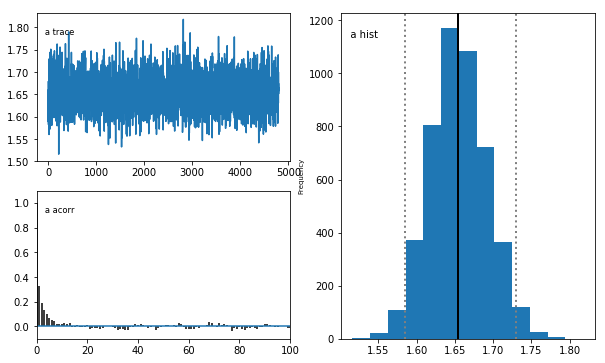

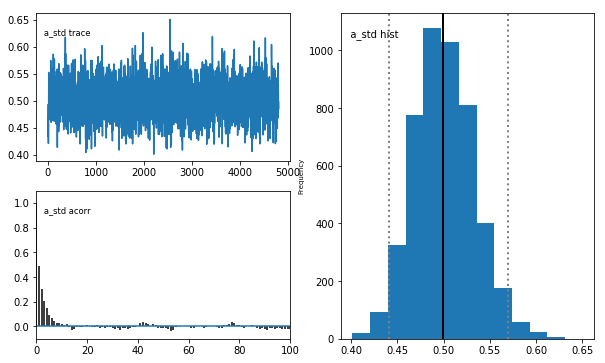

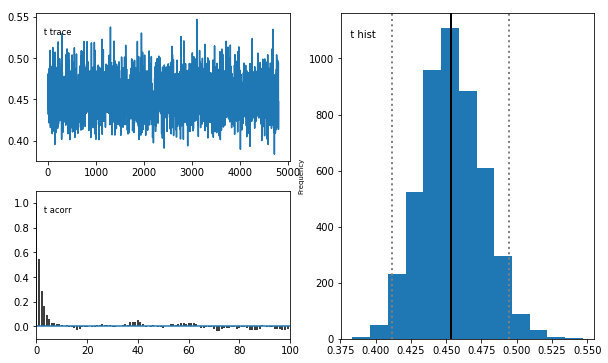

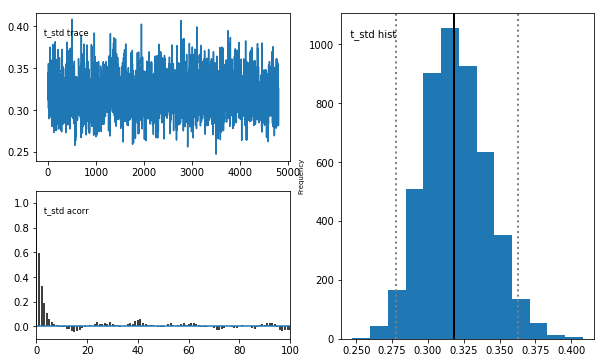

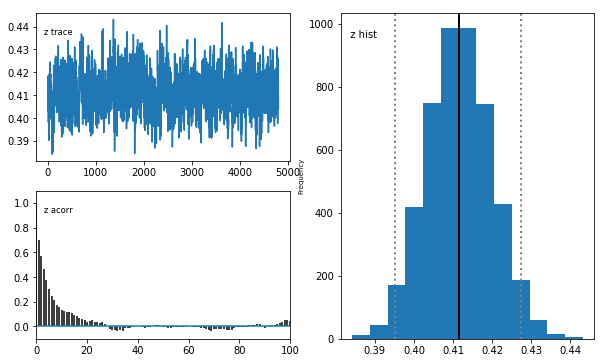

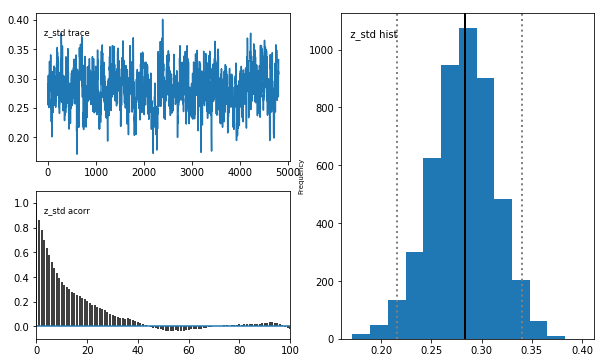

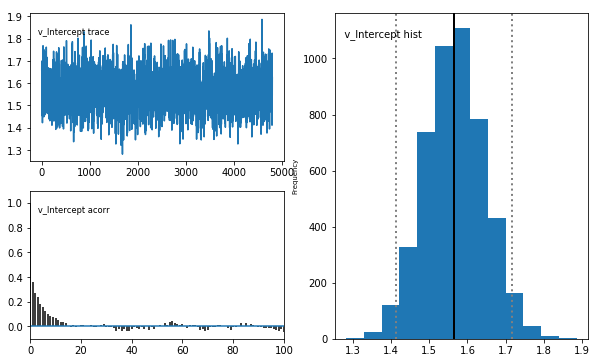

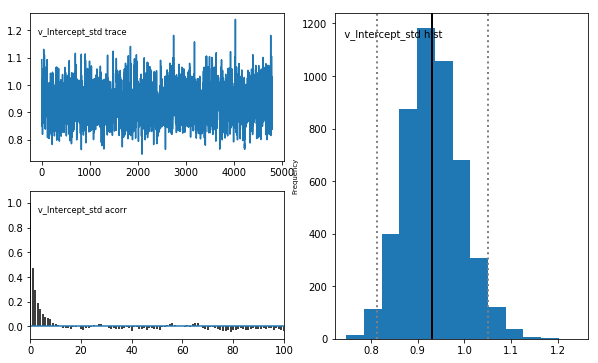

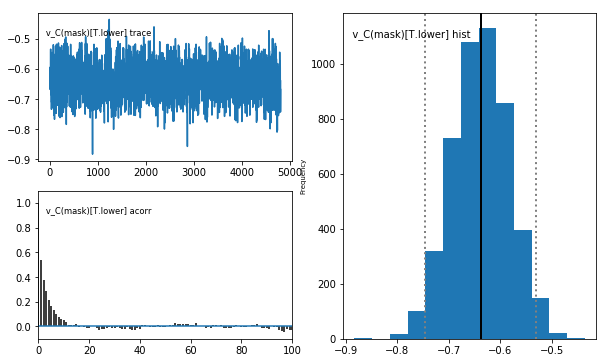

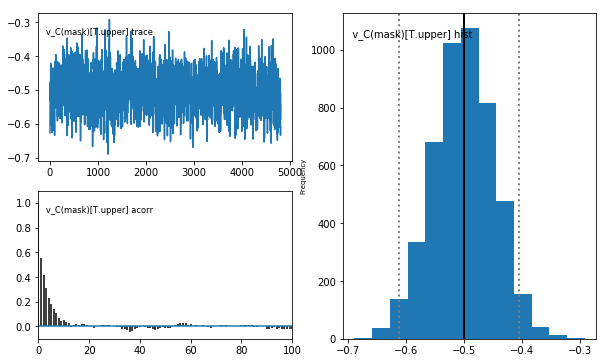

In [143]:
# save model stats
rr_stats = m_rr.gen_stats()
print(rr_stats)
# rr_stats.to_csv('_maskFalseNegatives/rr_5000/faceMask_hddm_faceRatings_maskFalseNegatives_rr_5000.csv', index=True)

# save model posterior plots
# m_rr.plot_posteriors(path='_maskFalseNegatives/rr_5000/_posteriors', save=True)

In [144]:
# plot model posteriors by mask
rr_v_none, rr_v_lower, rr_v_upper = m_rr.nodes_db.node[["v_Intercept", "v_C(mask)[T.lower]", "v_C(mask)[T.upper]"]]
hddm.analyze.plot_posterior_nodes([rr_v_none, rr_v_lower, rr_v_upper])
# plt.savefig('_maskFalseNegatives/rr_5000/faceMask_hddm_faceRatings_maskFalseNegatives_rr_5000_v_mask.pdf')

In [155]:
## estimate probabilities that mask coefficient posteriors differ from 0
# note that comparison condition coefficients (i.e. lower/upper) are *relative to* baseline condition (i.e. no mask)
# for lower/upper, =0 means no change from baseline, <0 means less than baseline, and >0 means greater than baseline
# for no mask, =0 means null drift, <0 means negative drift, and >0 means positive drift
print("P(rr_v_none < 0) = ", (rr_v_none.trace() < 0).mean())
print("P(rr_v_lower > 0) = ", (rr_v_lower.trace() > 0).mean())
print("P(rr_v_upper > 0) = ", (rr_v_upper.trace() > 0).mean())

# estimate probability that lower and upper mask coefficient posteriors differ
print("P(rr_v_lower > rr_v_upper) = ", (rr_v_lower.trace() > rr_v_upper.trace()).mean())

P(rr_v_none < 0) =  0.0
P(rr_v_lower > 0) =  0.0
P(rr_v_upper > 0) =  0.0
P(rr_v_lower > rr_v_upper) =  0.00520833333333
